# DataCamp - Data Scientist (Python)

##  Designing Machine Learning Workflows in Python                 


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Designing Machine Learning Workflows in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from numpy.random import uniform


In [3]:
from sklearn.preprocessing import LabelEncoder, FunctionTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve
from sklearn.metrics import roc_auc_score, make_scorer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_selection import chi2, SelectKBest, f_classif

from sklearn.pipeline import Pipeline

import pickle

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from sklearn.neighbors import DistanceMetric
from scipy.spatial.distance import pdist, squareform

import stringdist

##    CHAPTER 1  - The Standard Workflow


#### Exercício 1 - Supervised learning pipelines

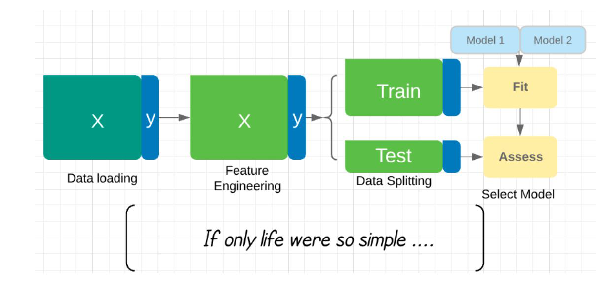

1. Scalable ways to tune your pipeline.
2. Making sure your predictions are relevant by involving domain experts.
3. Making sure your model continues to perform well over time.
4. Fitting models when you do not have enough labels.


In [4]:
#vídeo

# Labeled data
#  - Feature variables (shorthand: X )
#  - Labels or class (shorthand: y )

credit_scoring = pd.read_csv(data_folder + "credit.csv")
credit_scoring.head(4)

# Feature engineering
#  - Most classiers expect numeric features
#  - Need to convert string columns to numbers
# Preprocess using LabelEncoder from sklearn.preprocessing :
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit_transform(credit_scoring['checking_status'])[:4]

# Model fitting
#  - .fit(features, labels)
#  - .predict(features)

features, labels = credit_scoring.drop('class', 1), credit_scoring['class']
#ou
X, y = credit_scoring.drop('class', 1), credit_scoring['class']

from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
# model_nb.fit(features, labels)           # é preciso fazer o tratamento primeiro
# model_nb.predict(features.head(5))       # 60% accuracy on the first 5 examples.

#########

# Model selection
#  - .fit() optimizes the parameters of the given model
#  - What about other models?
#  - AdaBoostClassifier outperforms GaussianNB on rst ve data points:

from sklearn.ensemble import AdaBoostClassifier

model_ab = AdaBoostClassifier()
# model_ab.fit(features, labels)
# model_ab.predict(features.head(5))
# numpy.array(labels[0:5])

###########

# Performance assessment
#  - Larger sample sizes ⇒ better accuracy estimates:

from sklearn.metrics import accuracy_score

# accuracy_score(labels, model_nb.predict(features))     # naive bayes
# accuracy_score(labels, model_ab.predict(features))     # adaboost

# What is wrong with this calculation? (overfitting)

# Overtting and data splitting
# Overtting: a model will always perform better on the data it was trained on than on unseen data
# Train on X_train, y_train , assess accuracy on X_test, y_test :

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# GaussianNB().fit(X_train, y_train).predict(X_test)

imagem = plt.imread(data_folder + "curso.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.3, right=1.3, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

# So, what is this course about?
print('1. Scalable ways to tune your pipeline.')
print('2. Making sure your predictions are relevant by involving domain experts.')
print('3. Making sure your model continues to perform well over time.')
print('4. Fitting models when you do not have enough labels.')

# Could you have prevented the mortgage crisis?

Exercício 2

In [5]:
# Feature engineering

# You are tasked to predict whether a new cohort of loan applicants are likely to default on their loans. You have a 
# historical dataset and wish to train a classifier on it. You notice that many features are in string format, which is a
# problem for your classifiers. You hence decide to encode the string columns numerically using LabelEncoder(). 
# The dataset credit is also preloaded, as is a list of all column names whose data types are string (non_numeric_columns).

credit = pd.read_csv(data_folder + "credit.csv")

non_numeric_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status',
                       'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone',
                       'foreign_worker']

from sklearn.preprocessing import LabelEncoder

#################

# Inspect the first few lines of your data using head()
credit.head(3)

# Create a label encoder for each column. Encode the values
for column in non_numeric_columns:
    le = LabelEncoder()
    credit[column] = le.fit_transform(credit[column])

# Inspect the data types of the columns of the data frame
print(credit.dtypes)

credit.head()

checking_status            int32
duration                   int64
credit_history             int32
purpose                    int32
credit_amount              int64
savings_status             int32
employment                 int32
installment_commitment     int64
personal_status            int32
other_parties              int32
residence_since            int64
property_magnitude         int32
age                        int64
other_payment_plans        int32
housing                    int32
existing_credits           int64
job                        int32
num_dependents             int64
own_telephone              int32
foreign_worker             int32
class                     object
dtype: object


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,4,1169,4,3,4,3,2,...,2,67,1,1,2,3,1,1,1,good
1,0,48,3,4,5951,2,0,2,0,2,...,2,22,1,1,1,3,1,0,1,bad
2,3,12,1,6,2096,2,1,2,3,2,...,2,49,1,1,1,2,2,0,1,good
3,1,42,3,2,7882,2,1,2,3,1,...,0,45,1,0,1,3,2,0,1,good
4,1,24,2,3,4870,2,0,3,3,2,...,1,53,1,0,2,3,2,0,1,bad


Exercício 3

In [6]:
# Your first pipeline

# Your colleague has used AdaBoostClassifier for the credit scoring dataset. 
# You want to also try out a random forest classifier. In this exercise, you will fit this classifier to the data and 
# compare it to AdaBoostClassifier. Make sure to use train/test data splitting to avoid overfitting. 
# The data is preloaded and transformed so that all features are numeric. The features are available as X and the labels 
# as y. The module RandomForestClassifier has also been preloaded.

accuracies = {'ab': 0.75}  #assuming random_state=2 as well..

y = credit['class']
X = credit.drop('class', 1)

from sklearn.ensemble import RandomForestClassifier

# Split the data into train and test, with 20% as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a random forest classifier, fixing the seed to 2
rf_model = RandomForestClassifier(n_estimators=100, random_state=2).fit(X_train, y_train)

# Use it to predict the labels of the test data
rf_predictions = rf_model.predict(X_test)

# Assess the accuracy of both classifiers
from sklearn.metrics import accuracy_score

accuracies['rf'] = accuracy_score(y_test, rf_predictions)
print(accuracies)

{'ab': 0.75, 'rf': 0.775}


#### Exercício 4 - Model complexity and overfitting

max_depth=2:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=486666950, splitter='best') 

max_depth=4:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2101963047, splitter='best')


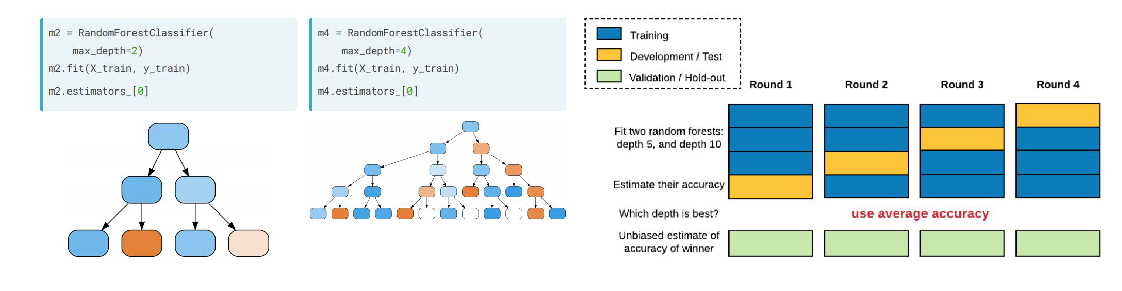


5-fold Cross-validation: [0.70807453 0.775      0.71875    0.76875    0.7672956 ].
Mean: 0.7475740263291536

Best value for the hyperparameter 'max_depth': {'max_depth': 10}


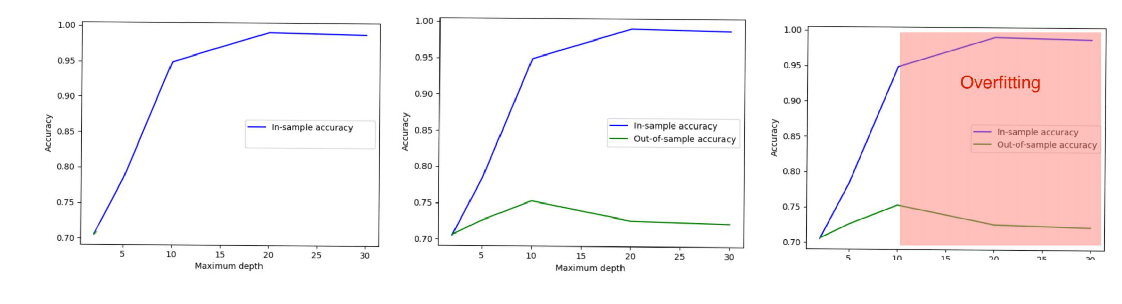

More complexity is not always better.


In [7]:
#vídeo

# What is model complexity?
# RandomForestClassifier() takes additional arguments, like 'max_depth' :

# help(RandomForestClassifier)

m2 = RandomForestClassifier(max_depth=2, n_estimators=100)
m2.fit(X_train, y_train)
print("max_depth=2:\n", m2.estimators_[0], "\n")

m2 = RandomForestClassifier(max_depth=4, n_estimators=100)
m2.fit(X_train, y_train)
print("max_depth=4:\n", m2.estimators_[0])

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "max_depth.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "max_depth_rounds.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.5, right=2.5, top=1, wspace=0, hspace=0)
plt.show()


###############################

# Cross-validation
# Assess accuracy using cross_val_score() :
from sklearn.model_selection import cross_val_score
cv5 = cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=5)
print("\n5-fold Cross-validation: {}.\nMean: {}".format(cv5, np.mean(cv5)))

###############################

# Tuning model complexity
# Tune the tree depth using GridSearchCV() :
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[5, 10, 20]}
grid = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid, cv=5)
grid.fit(X_train, y_train)
print("\nBest value for the hyperparameter 'max_depth': {}".format(grid.best_params_))

#####

plt.subplot(1, 3, 1)
imagem = plt.imread(data_folder + "max_depth_graph1.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 3, 2)
imagem = plt.imread(data_folder + "max_depth_graph2.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 3, 3)
imagem = plt.imread(data_folder + "max_depth_graph3.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.5, right=2.5, top=1, wspace=0, hspace=0)
plt.show()

print("More complexity is not always better.")

Exercício 5

In [8]:
# Grid search CV for model complexity

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Set a range for n_estimators from 10 to 40 in steps of 10
param_grid = {'n_estimators': range(10, 50, 10)}

# Optimize for a RandomForestClassifier using GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X, y)
print("RandomForestClassifier best parameter: {}".format(grid.best_params_))

#############################

# Define a grid for n_estimators ranging from 1 to 10
param_grid = {'n_estimators': range(1, 11)}

# Optimize for a AdaBoostClassifier using GridSearchCV
grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3)
grid.fit(X, y)
print("AdaBoostClassifier best parameter: {}".format(grid.best_params_))

#############################

# Define a grid for n_neighbors with values 10, 50 and 100
param_grid = {'n_neighbors': [10, 50, 100]}

# Optimize for KNeighborsClassifier using GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid.fit(X, y)
print("KNeighborsClassifier best parameter: {}".format(grid.best_params_))


RandomForestClassifier best parameter: {'n_estimators': 40}
AdaBoostClassifier best parameter: {'n_estimators': 10}
KNeighborsClassifier best parameter: {'n_neighbors': 50}


Exercício 6

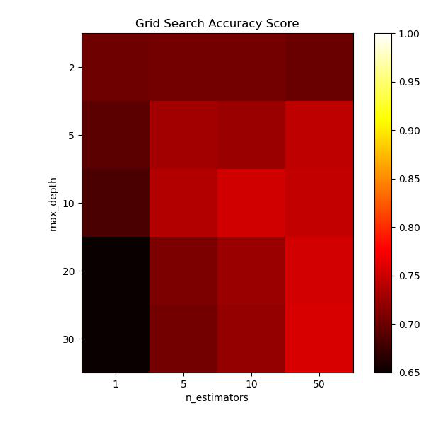

As the number of estimators increases, it is better to use deeper trees


In [9]:
# Number of trees and estimators

# Random forests are an ensemble over a large number of decision trees. The number of trees used is controlled by a
# parameter called n_estimators. Below you can see a heatmap of the accuracy of a random forest classifier. Different values
# of maximum depth (max_depth) are shown on the vertical axis. Different numbers of estimators (n_estimators) are shown on 
# the horizontal axis. How does the performance of the classifier depend on these two hyperparameters in this case?

imagem = plt.imread(data_folder + "ex6.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.4, right=1.4, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

print("As the number of estimators increases, it is better to use deeper trees")

#### Exercício 7 - Feature engineering and overfitting

In [10]:
#vídeo

# Feature extraction from non-tabular data

arrhythmias = pd.read_csv(data_folder + "arrh.csv")
arrhythmias.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,0


In [11]:
credit_scoring.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',buy_radio_tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',buy_radio_tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',buy_furniture_equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously',buy_new_car,4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


np.unique(credit_scoring['purpose']):
 ['business' 'buy_domestic_appliance' 'buy_furniture_equipment'
 'buy_new_car' 'buy_radio_tv' 'buy_used_car' 'education' 'other' 'repairs'
 'retraining']

np.unique(LabelEncoder().fit_transform(credit_scoring['purpose'])):
 [0 1 2 3 4 5 6 7 8 9]

Label encoding:


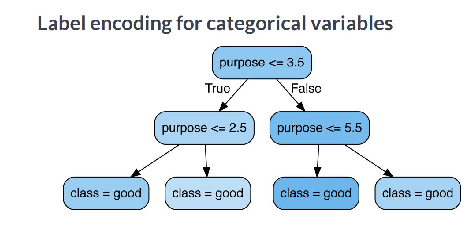

One hot encoding for the first line:
 business                   0
buy_domestic_appliance     0
buy_furniture_equipment    0
buy_new_car                0
buy_radio_tv               1
buy_used_car               0
education                  0
other                      0
repairs                    0
retraining                 0
Name: 1, dtype: uint8

Keyword encoding:


,appliance,business,buy,car,domestic,education,equipment,furniture,new,other,radio,repairs,retraining,tv,used
0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [12]:
# Label encoding for categorical variables
print("np.unique(credit_scoring['purpose']):\n", np.unique(credit_scoring['purpose']))
print("\nnp.unique(LabelEncoder().fit_transform(credit_scoring['purpose'])):\n", 
      np.unique(LabelEncoder().fit_transform(credit_scoring['purpose'])))

# Label encoding for categorical variables
print("\nLabel encoding:")
imagem = plt.imread(data_folder + "label_encoding.jpg")
plt.axis('off')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.imshow(imagem)
plt.show()

################################

# One hot encoding for categorical variables
print("One hot encoding for the first line:\n", pd.get_dummies(credit_scoring['purpose']).iloc[1])

################################

# Keyword encoding for categorical variables
from sklearn.feature_extraction.text import CountVectorizer

print("\nKeyword encoding:")
vec = CountVectorizer()

credit_scoring['purpose'] = credit_scoring['purpose'].apply(lambda s: ' '.join(s.split('_')), 0) #estava p ex 'buy_radio_tv'

dummy_matrix = vec.fit_transform(credit_scoring['purpose']).toarray()

pd.DataFrame(dummy_matrix, columns=vec.get_feature_names()).head()

In [13]:
# Dimensionality and feature engineering

#  Categorical variables in credit :
#     Label encoding: 1 column.
#     One-hot encoding: 10 columns.
#     Keyword encoding: 15 columns.

# ECG features in arrhythmias :
#    Over 250 features

#############################

# Feature selection
from numpy.random import uniform

n=1000
fakes = pd.DataFrame(uniform(low=0.0, high=1.0, size=n * 100).reshape(X.shape[0], 100), 
                     columns=['fake_' + str(j) for j in range(100)])

X_with_fakes = pd.concat([X, fakes], 1)

X_with_fakes.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,fake_90,fake_91,fake_92,fake_93,fake_94,fake_95,fake_96,fake_97,fake_98,fake_99
0,1,6,1,4,1169,4,3,4,3,2,...,0.192266,0.577025,0.126667,0.203059,0.749833,0.763425,0.949646,0.868863,0.153252,0.827256
1,0,48,3,4,5951,2,0,2,0,2,...,0.121307,0.811656,0.717972,0.435656,0.778434,0.589802,0.878256,0.825166,0.583565,0.531644
2,3,12,1,6,2096,2,1,2,3,2,...,0.555792,0.159965,0.744651,0.253082,0.298289,0.551519,0.306888,0.931003,0.885764,0.036572
3,1,42,3,2,7882,2,1,2,3,1,...,0.568780,0.896408,0.238214,0.794113,0.445886,0.310985,0.927227,0.694576,0.430627,0.894143
4,1,24,2,3,4870,2,0,3,3,2,...,0.919193,0.190100,0.574530,0.682189,0.552210,0.470211,0.743203,0.699156,0.429936,0.741257


In [14]:
from sklearn.feature_selection import chi2, SelectKBest   # --> to feature_selection

sk = SelectKBest(chi2, k=20)

which_selected = sk.fit(X_with_fakes, y).get_support()  # get_support() gets the index of the selected columns

print("selected columns: \n ", X_with_fakes.columns[which_selected])

# Tradeoffs everywhere..

selected columns: 
  Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'installment_commitment',
       'personal_status', 'property_magnitude', 'age', 'other_payment_plans',
       'existing_credits', 'job', 'own_telephone', 'fake_5', 'fake_7',
       'fake_9', 'fake_19', 'fake_82', 'fake_87'],
      dtype='object')


Exercício 8

In [15]:
# Categorical encodings

# Your colleague has converted the columns in the credit dataset to numeric values using LabelEncoder(). He left one out:
# credit_history, which records the credit history of the applicant. You want to create two versions of the dataset.
# One will use LabelEncoder() and another one-hot encoding, for comparison purposes. 
# The feature matrix is available to you as credit

credit = pd.read_csv(data_folder + "credit.csv")

non_numeric_columns = ['checking_status', 'purpose', 'savings_status', 'employment', 'personal_status',
                       'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone',
                       'foreign_worker']  # tirei 'credit_history' da lista feita anteriormente

from sklearn.preprocessing import LabelEncoder

for column in non_numeric_columns:
    le = LabelEncoder()
    credit[column] = le.fit_transform(credit[column])
    
y = credit['class']
X = credit.drop(['class', 'credit_history'], 1)

#################

# Create numeric encoding for credit_history
credit_history_num = LabelEncoder().fit_transform(credit['credit_history'])

# Create a new feature matrix including the numeric encoding
X_num = pd.concat([X, pd.Series(credit_history_num)], 1)

# Create new feature matrix with dummies for credit_history
X_hot = pd.concat([X, pd.get_dummies(credit['credit_history'])], 1)

# Compare the number of features of the resulting DataFrames
print("Number of features when creating dummies: {}".format(X_hot.shape[1]))
print("Number of features when using LabelEncoder: {}".format(X_num.shape[1]))


Number of features when creating dummies: 24
Number of features when using LabelEncoder: 20


Exercício 9

In [16]:
# Feature transformations

# You are discussing the credit dataset with the bank manager. She suggests that the safest loan applications tend to
# request mid-range credit amounts. Values that are either too low or too high suggest high risk. This means that a 
# non-linear relationship might exist between this variable and the class. 
# ---> You want to test this hypothesis. <----
# You will construct a non-linear transformation of the feature. Then, you will assess which of the two features is better
# at predicting the class using SelectKBest() and the chi2() metric.

from sklearn.feature_selection import chi2, SelectKBest

credit = pd.read_csv(data_folder + "credit.csv")

###########################

# Function computing absolute difference from column mean
def abs_diff(x):
    return abs(x-np.mean(x))

# Apply it to the credit amount and store to new column
credit['diff'] = abs_diff(credit['credit_amount'])

# Create a feature selector with chi2 that picks one feature
sk = SelectKBest(chi2, 1)

# Use the selector to pick between credit_amount and diff
sk.fit(pd.concat([credit['credit_amount'], credit['diff']], 1), credit['class'])

# Inspect the results
sk.get_support()  # --> the non-linear transformation of the feature I've built is not better at predicting the class


array([ True, False])

Exercício 10

In [17]:
# Bringing it all together

# You just joined an arrhythmia detection startup and want to train a model on the arrhythmias dataset arrh. You noticed 
# that random forests tend to win quite a few Kaggle competitions, so you want to try that out with a maximum depth of 2, 5,
# or 10, using grid search. You also observe that the dimension of the dataset is quite high so you wish to consider the 
# effect of a feature selection method.

# To make sure you don't overfit by mistake, you have already split your data. You will use X_train and y_train for the 
#grid search, and X_test and y_test to decide if feature selection helps. All four dataset folds are preloaded in your 
#environment. You also have access to GridSearchCV(), train_test_split(), SelectKBest(), chi2() and RandomForestClassifier 
#as rfc.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier

arrh = pd.read_csv(data_folder + "arrh.csv")

y = arrh['class']
X = arrh.drop('class', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

    
arrh.head()
######################################################

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,0


In [18]:
# transformações que fizeram para poder aplicar o chi2 - em vez de normalizar ou utilizar f_classif p ex, 
# fizeram abs() simplesmente
for i in X_train.columns:
    X_train[i] = abs(X_train[i])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
# Find the best value for max_depth among values 2, 5 and 10
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=1), 
                           param_grid={'max_depth': [2, 5, 10]},
                           cv=5, iid=False)

best_values = grid_search.fit(X_train, y_train).best_params_
print("best values:", best_values)

# Using the best value from above, fit a random forest
clf = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=best_values['max_depth']).fit(X_train, y_train)

# Apply SelectKBest with chi2 and pick top 100 features
vt = SelectKBest(chi2, k=100).fit(X_train, y_train)

# Create a new dataset only containing the selected features
X_train_reduced = vt.transform(X_train)


# You are already able to handle hundreds of features in a few lines of code! But what if the optimal number of estimators
# is different if you first apply feature selection? In Chapter 3 you will learn how to put your pipelines on steroids so 
# that such questions can be asked in just one line of code.
X_train_reduced

best values: {'max_depth': 10}


array([[1.60e+02, 8.40e+01, 1.86e+02, ..., 0.00e+00, 2.20e+00, 5.28e+01],
       [1.75e+02, 9.60e+01, 1.41e+02, ..., 1.00e-01, 2.50e+00, 5.74e+01],
       [1.70e+02, 1.13e+02, 2.16e+02, ..., 2.00e-01, 0.00e+00, 6.18e+01],
       ...,
       [1.58e+02, 8.20e+01, 1.22e+02, ..., 2.00e-01, 7.00e-01, 4.06e+01],
       [1.73e+02, 1.03e+02, 1.55e+02, ..., 1.40e+00, 2.60e+00, 8.50e+00],
       [1.64e+02, 8.50e+01, 2.00e+02, ..., 2.00e-01, 1.30e+00, 6.77e+01]])

In [20]:
# mesmos valores que
assert len(X_train.columns[vt.get_support()]) == len(X_train_reduced[0])

# dataframe com as colunas escolhidas
X_train[X_train.columns[vt.get_support()]].head()

,height,QRSduration,PRinterval,Tinterval,Pinterval,QRS,T,QRST,J,heartrate,...,chV4_QwaveAmp,chV4_SwaveAmp,chV4_QRSA,chV4_QRSTA,chV5_JJwaveAmp,chV5_QwaveAmp,chV5_QRSTA,chV6_JJwaveAmp,chV6_SwaveAmp,chV6_QRSTA
223,160,84,186,166,113,35,139,88,69,50,...,0.0,6.8,26.3,72.3,1.1,0.0,60.6,0.0,2.2,52.8
305,175,96,141,225,87,80,112,102,69,49,...,0.0,18.3,23.2,106.3,0.2,0.8,93.0,0.1,2.5,57.4
162,170,113,216,193,170,50,142,98,69,27,...,1.1,11.8,1.4,54.5,0.2,0.9,67.3,0.2,0.0,61.8
291,170,99,164,190,92,50,150,104,11,27,...,0.9,2.0,51.2,89.6,1.2,1.6,73.0,1.0,0.0,46.5
93,165,72,169,135,85,13,47,4,35,3,...,0.0,5.2,7.2,13.5,0.5,0.0,11.4,0.2,1.2,10.7


# CHAPTER 2 - The Human in the Loop

#### Exercício 1 - Data fusion

time                    471692
duration                     0
source_computer          C5808
source_port              N2414
destination_computer    C26871
destination_port        N19148
protocol                     6
packet_count                 1
byte_count                  60
Name: 1, dtype: object


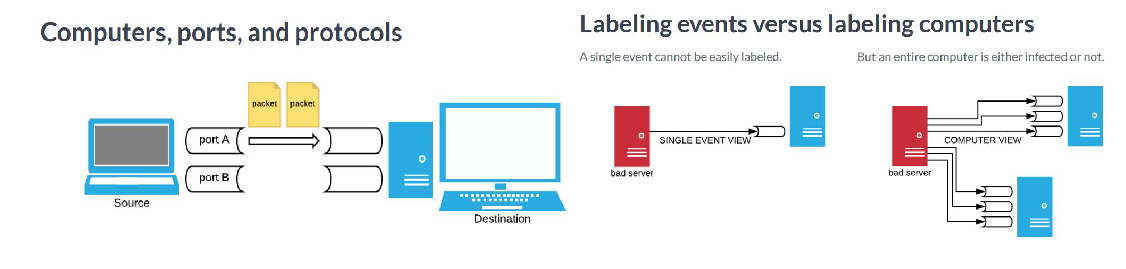

In [21]:
#vídeo

flows = pd.read_csv(data_folder + "lanl_flows.csv")

# Computers, ports, and protocols
plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "computers_protocols.jpg")
plt.axis('off')
plt.imshow(imagem)

# The LANL cyber dataset

# flows : Flows are sessions of continuous data transfer between a port on a source computer and a
#         port on a destination computer,following a certain protocol.
print(flows.iloc[1])


# attack : information about certain attacks performed by the security team itself during a test.
# attack.head()

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "labeling_events.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.5, right=2.5, top=1, wspace=0, hspace=0)
plt.show()

# Group and featurize
#Unit of analysis = destination_computer
flows_grouped = flows.groupby('destination_computer')

list(flows_grouped)[0]

# Group and featurize
#From one DataFrame per computer, to one feature vector per computer
def featurize(df):
    return {
        'unique_ports': len(set(df['destination_port'])),
        'average_packet': np.mean(df['packet_count']),
        'average_duration': np.mean(df['duration'])
        }

out = flows.groupby('destination_computer').apply(featurize)

#X = pd.DataFrame(list(out), index=out.index)
#X.head()

############################

# Labeled dataset

# bads = set(attacks['source_computer'].append(attacks['destination_computer']))
# y = [x in bads for x in X.index]

#The pair (X, y) is now a standard labeled classication dataset.

#X_train, X_test, y_train, y_test = train_test_split(X, y)
#clf = AdaBoostClassifier()
#accuracy_score(y_test, clf.fit(X_train, y_train).predict(X_test))

Exercício 2

In [22]:
# Is the source or the destination bad?

# In the previous lesson, you used the destination computer as your entity of interest. However, your cybersecurity analyst
# just told you that it is the infected machines that generate the bad traffic, and will therefore appear as a source, not 
# a destination, in the flows dataset.

# The data flows has been preloaded, as well as the list bad of infected IDs and the feature extractor featurizer() from
# the previous lesson. You also have numpy available as np, AdaBoostClassifier, and cross_val_score().

flows = pd.read_csv(data_folder + "lanl_flows.csv")

bads = {'C1', 'C10', 'C10005', 'C1003', 'C1006', 'C1014', 'C1015', 'C102', 'C1022', 'C1028', 'C10405', 'C1042', 'C1046', 'C10577', 'C1065', 'C108', 'C10817', 'C1085', 'C1089', 'C1096', 'C11039', 'C11178', 'C1119', 'C11194', 'C1124', 'C1125', 'C113', 'C115', 'C11727', 'C1173', 'C1183', 'C1191', 'C12116', 'C1215', 'C1222', 'C1224', 'C12320', 'C12448', 'C12512', 'C126', 'C1268', 'C12682', 'C1269', 'C1275', 'C1302', 'C1319', 'C13713', 'C1382', 'C1415', 'C143', 'C1432', 'C1438', 'C1448', 'C1461', 'C1477', 'C1479', 'C148', 'C1482', 'C1484', 'C1493', 'C15', 'C1500', 'C1503', 'C1506', 'C1509', 'C15197', 'C152', 'C15232', 'C1549', 'C155', 'C1555', 'C1567', 'C1570', 'C1581', 'C16088','C1610', 'C1611', 'C1616', 'C1626', 'C1632', 'C16401', 'C16467', 'C16563', 'C1710', 'C1732', 'C1737', 'C17425', 'C17600', 'C17636', 'C17640', 'C17693', 'C177', 'C1776', 'C17776', 'C17806', 'C1784', 'C17860', 'C1797', 'C18025', 'C1810', 'C18113', 'C18190', 'C1823', 'C18464', 'C18626', 'C1887', 'C18872', 'C19038', 'C1906', 'C19156', 'C19356', 'C1936', 'C1944', 'C19444', 'C1952', 'C1961', 'C1964', 'C1966', 'C1980', 'C19803', 'C19932', 'C2012', 'C2013', 'C20203', 'C20455', 'C2057', 'C2058', 'C20677', 'C2079', 'C20819', 'C2085', 'C2091', 'C20966', 'C21349', 'C21664', 'C21814', 'C21919', 'C21946', 'C2196', 'C21963', 'C22174', 'C22176', 'C22275', 'C22409', 'C2254', 'C22766', 'C231', 'C2341', 'C2378', 'C2388', 'C243', 'C246', 'C2519', 'C2578', 'C2597', 'C2604', 'C2609', 'C2648', 'C2669', 'C2725', 'C2816', 'C2844','C2846', 'C2849', 'C2877', 'C2914', 'C294', 'C2944', 'C3019', 'C302', 'C3037', 'C305', 'C306', 'C307', 'C313', 'C3153', 'C3170', 'C3173', 'C3199', 'C3249', 'C3288', 'C3292', 'C3303', 'C3305', 'C332', 'C338', 'C3380', 'C3388', 'C3422', 'C3435', 'C3437', 'C3455', 'C346', 'C3491', 'C3521', 'C353', 'C3586', 'C359', 'C3597', 'C3601', 'C3610', 'C3629', 'C3635', 'C366', 'C368', 'C3699', 'C370', 'C3755', 'C3758', 'C3813', 'C385', 'C3888', 'C395', 'C398', 'C400', 'C4106', 'C4159', 'C4161', 'C42', 'C423', 'C4280', 'C429', 'C430', 'C4403', 'C452', 'C4554', 'C457', 'C458', 'C46', 'C4610', 'C464', 'C467', 'C477', 'C4773', 'C4845', 'C486', 'C492', 'C4934', 'C5030', 'C504', 'C506', 'C5111', 'C513', 'C52', 'C528', 'C529', 'C5343', 'C5439', 'C5453', 'C553', 'C5618', 'C5653', 'C5693', 'C583', 'C586', 'C61', 'C612', 'C625', 'C626', 'C633', 'C636', 'C6487', 'C6513', 'C685', 'C687', 'C706', 'C7131', 'C721', 'C728', 'C742', 'C7464', 'C7503', 'C754', 'C7597', 'C765', 'C7782', 'C779', 'C78', 'C791', 'C798', 'C801', 'C8172', 'C8209', 'C828', 'C849', 'C8490', 'C853', 'C8585', 'C8751', 'C881', 'C882', 'C883', 'C886', 'C89', 'C90', 'C9006', 'C917', 'C92', 'C923', 'C96', 'C965', 'C9692', 'C9723', 'C977', 'C9945'}
# bads = set(attacks['source_computer'].append(attacks['destination_computer']))   ---> era necessário 'attacks'

def featurize(df):
    return {
        'unique_ports': len(set(df['destination_port'])),
        'average_packet': np.mean(df['packet_count']),
        'average_duration': np.mean(df['duration'])
        }

########################################################################################

#Group by source computer, and apply the feature extractor
out = flows.groupby('source_computer').apply(featurize)

# Convert the iterator to a dataframe by calling list on it
X = pd.DataFrame(list(out), index=out.index)

# Check which sources in X.index are bad to create labels       ---> it's a bolean
y = [x in bads for x in X.index]  

# Report the average accuracy of Adaboost over 3-fold CV
print("mean cross_val_score: {}".format(np.mean(cross_val_score(AdaBoostClassifier(), X, y, cv=5))))

# You have successfully incorporated your analyst's feedback. Let's now try to add some more features.

#meu
print("\n", out[0], "\n")
print(X.head())
flows.head()

mean cross_val_score: 0.9428839671461805

 {'unique_ports': 4, 'average_packet': 222.0, 'average_duration': 5.0} 

                 average_duration  average_packet  unique_ports
source_computer                                                
C10                      5.000000      222.000000             4
C10026                  39.000000       21.000000             2
C10047                   7.538462       21.076923             5
C1015                   27.571429        5.371429            35
C10235                   0.000000       11.000000             1


,time,duration,source_computer,source_port,destination_computer,destination_port,protocol,packet_count,byte_count
0,471692,0,C5808,N24128,C26871,N17023,6,1,60
1,471692,0,C5808,N2414,C26871,N19148,6,1,60
2,471692,0,C5808,N24156,C26871,N8001,6,1,60
3,471692,0,C5808,N24161,C26871,N18502,6,1,60
4,471692,0,C5808,N24162,C26871,N11309,6,1,60


Exercício 3

In [23]:
# Feature engineering on grouped data

# You will now build on the previous exercise, by considering one additional feature: the number of unique protocols used
# by each source computer. Note that with grouped data, it is always possible to construct features in this manner: you can 
# take the number of unique elements of all categorical columns, and the mean of all numeric columns as your starting point

# Create a feature counting unique protocols per source
protocols = flows.groupby('source_computer').apply(lambda df: len(set(df['protocol'])))

# Convert this feature into a dataframe, naming the column
protocols_DF = pd.DataFrame(protocols, index=protocols.index, columns=['protocol'])

# Now concatenate this feature with the previous dataset, X
X_more = pd.concat([X, protocols_DF], axis=1)

# Refit the classifier and report its accuracy
print(np.mean(cross_val_score(AdaBoostClassifier(), X_more, y, cv=5)))

#You just achieved a further improvement by adding the number of unique protocols used by each source as a feature.

0.9428839671461805


#### Exercício 4 - Imperfect labels

labels are not always black and white. there are several types of 'truth'
15.11111111111111
11.235294117647058


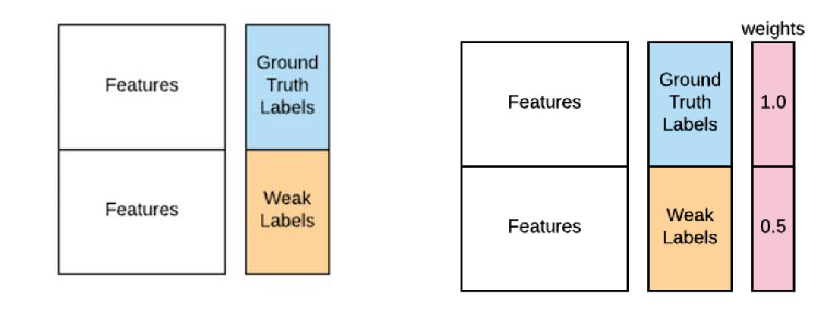

0.9463087248322147
w/ weights: 0.9530201342281879


In [24]:
#vídeo

# Labels are not always perfect
# Degrees of truth:
print("labels are not always black and white. there are several types of 'truth'")

#  Ground truth
#    the computer crashes and a message asks for ransom money
#  Human exper labeling
#    the analyst inspects the computer logs and identies unauthorized behaviors
#  Heuristic labeling
#    too many ports received traffic in a very small period of time

# Labels are not always perfect
# Noiseless or strong labels:
#   Ground truth
#   Human expert labeling
# Noisy or weak labels:
#   Heuristic labeling
# Feature engineering:
#   Features used in heuristics

# Features and heuristics

# Average of unique ports visited by each infected host:
print(np.mean(X[y]['unique_ports']))

# Average of unique ports visited per host disregarding labels:
print(np.mean(X['unique_ports']))

# From features to labels
#Convert a feature into a labeling heuristic:
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_weak_train = X_train['unique_ports'] > 15

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "feature_to_label.jpg")
plt.axis('off')
plt.imshow(imagem)

X_train_aug = pd.concat([X_train, X_train])
y_train_aug = pd.concat([pd.Series(y_train), pd.Series(y_weak_train)])

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "feature_to_label2.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()

weights = [1.0]*len(y_train) + [0.1]*len(y_weak_train)

# Accuracy using ground truth only:  0.91

# Ground truth and weak labels without weights:
print(accuracy_score(y_test, clf.fit(X_train_aug, y_train_aug).predict(X_test)))

# Add weights:
print("w/ weights:", accuracy_score(y_test, clf.fit(X_train_aug, y_train_aug, sample_weight=weights).predict(X_test)))

Exercício 5

In [25]:
# Turning a heuristic into a classifier

# You are surprised by the fact that heuristics can be so helpful. So you decide to treat the heuristic that "too many 
# unique ports is suspicious" as a classifier in its own right. You achieve that by thresholding the number of unique ports 
# per source by the average number used in bad source computers -- these are computers for which the label is True. The
# dataset is preloaded and split into training and test, so you have objects X_train, X_test, y_train and y_test in memory. 
# Your imports include accuracy_score(), and numpy as np. 

# To clarify: you won't be fitting a classifier from scikit-learn in this exercise, but instead you will define your own 
# classification rule explicitly!

##########################################

# Create a new dataset X_train_bad by subselecting bad hosts (Note that y_train is a Boolean array.)
X_train_bad = X_train[y_train]

# Calculate the average of unique_ports in bad examples
avg_bad_ports = np.mean(X_train_bad['unique_ports'])

# Label as positive sources that use more ports than that
pred_port = X_test['unique_ports'] > avg_bad_ports

# Print the accuracy of the heuristic
print(accuracy_score(y_test, pred_port))

# Isn't it surprising how well a simple heuristic can do on a real problem? Let's see if we can find more such simple rules.

0.9463087248322147


Exercício 6

In [26]:
# Combining heuristics

# A different cyber analyst tells you that during certain types of attack, the infected source computer sends small bits of
# traffic, to avoid detection. This makes you wonder whether it would be better to create a combined heuristic that 
# simultaneously looks for large numbers of ports and small packet sizes. Does this improve performance over the simple
# port heuristic? As with the last exercise, you have X_train, X_test, y_train and y_test in memory.
# The sample code also helps you reproduce the outcome of the port heuristic, pred_port. 

#######################

# Compute the mean of average_packet for bad sources
avg_bad_packet = np.mean(X_train[y_train]['average_packet'])

# Label as positive if average_packet is lower than that
pred_packet = X_test['average_packet'] < avg_bad_packet

# Find indices where pred_port and pred_packet BOTH True
pred_port = X_test['unique_ports'] > avg_bad_ports  # ----> como visto anteriormente
pred_both = pred_packet & pred_port

# Ports only produced an accuracy of 0.919. Is this better?
print(accuracy_score(y_test, pred_both), ">", accuracy_score(y_test, pred_port))

print("""\nThe combined rule does pretty well. Often expert knowledge comes in the form of logical combinations of a large 
number of simple heuristics. In this case, having as a predictor a combined feature between a large number of ports
(pred_porth) and small packet sizes (pred_packet), which results in (pred_both), is better. """)

0.9530201342281879 > 0.9463087248322147

The combined rule does pretty well. Often expert knowledge comes in the form of logical combinations of a large 
number of simple heuristics. In this case, having as a predictor a combined feature between a large number of ports
(pred_porth) and small packet sizes (pred_packet), which results in (pred_both), is better. 


Exercício 7

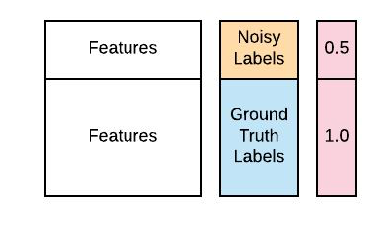

Accuracy without weights: 0.06040268456375839
Accuracy with weights: 0.0738255033557047


"imaginando que temos os dados 'noisy'"

In [27]:
# Dealing with label noise

# One of your cyber analysts informs you that many of the labels for the first 100 source computers in your training data 
# might be wrong because of a database error. She hopes you can still use the data because most of the labels are still 
# correct, but asks you to treat these 100 labels as "noisy". Thankfully you know how to do that, using weighted learning.

# The contaminated data is available in your workspace as X_train, X_test, y_train_noisy, y_test. You want to see if you 
# can improve the performance of a GaussianNB classifier using weighted learning. You can use the optional parameter 
# sample_weight, which is supported by the .fit() methods of most popular classifiers. The function accuracy_score() is 
# preloaded. You can consult the image below for guidance.

imagem = plt.imread(data_folder + "noisy_labels.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.show()

from sklearn.naive_bayes import GaussianNB

################################################

# Fit a Gaussian Naive Bayes classifier to the training data
clf = GaussianNB().fit(X_train, y_train)

# Report its accuracy on the test data
print("Accuracy without weights:", accuracy_score(y_test, clf.predict(X_test)))

# Assign half the weight to the first 100 noisy examples
weights = [0.5]*100 + [1.0]*(len(y_train)-100)

# Refit using weights and report accuracy. Has it improved?
clf_weights = GaussianNB().fit(X_train, y_train, sample_weight=weights)

print("Accuracy with weights:", accuracy_score(y_test, clf_weights.predict(X_test)))
"imaginando que temos os dados 'noisy'"

#### Exercício 8 - Loss functions Part I

In [28]:
%%script false
#vídeo

# The KDD '99 cup dataset
kdd.iloc[0]

##################################################

# False positives vs false negatives

# Binarize label:
kdd['label'] = kdd['label'] == 'bad'
# Fit a Gaussian Naive Bayes classier:
clf = GaussianNB().fit(X_train, y_train)
predictions = clf.predict(X_test)
results = pd.DataFrame({'actual': y_test, 'predicted': predictions})

# The confusion matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

conf_mat = confusion_matrix(ground_truth, predictions)     # confusion_matrix(y_test, y_predicted)

# get each one of the confusion matrix elements
tp, fp, fn, tn = conf_mat.ravel()
(fp, fn)

########################################

# Scalar performance metrics
accuracy = 1 - (fp + fn) / len(y_test)
recall = tp / (tp + fn)
fpr = fp / (tn + fp)
precision = tp / (tp + fp)
f1 = 2*(precision * recall) / (precision + recall)

accuracy_score(ground_truth, predictions)
recall_score(ground_truth, predictions)
precision_score(ground_truth, predictions)
f1_score(ground_truth, predictions)

# Classifier A 
tp, fp, fn, tn = confusion_matrix(ground_truth, predictions_A).ravel()
(fp,fn)
cost = 10 * fp + fn  # --> 33

# vs Classifier B
tp, fp, fn, tn = confusion_matrix(ground_truth, predictions_B).ravel()
(fp,fn)
cost = 10 * fp + fn    # --> 26, so in this case the cost of the false negative is a lot lower than the false positive


Couldn't find program: 'false'


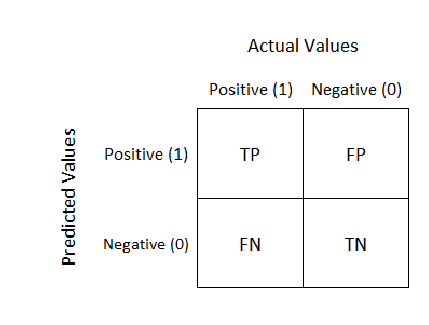

In [29]:
imagem = plt.imread(data_folder + "confusion_matrix.PNG")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 9

In [30]:
# Reminder of performance metrics

# Remember the credit dataset? With all the extra knowledge you now have about metrics, let's have another look at how good
# a random forest is on this dataset. You have already trained your classifier and obtained your confusion matrix on the 
# test data. The test data and the results are available to you as tp, fp, fn and tn, for true positives, false positives,
# false negatives, and true negatives respectively. You also have the ground truth labels for the test data, y_test and the
# predicted labels, preds. The functions f1_score() and precision_score() have also been imported.

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score

credit = pd.read_csv(data_folder + "credit.csv")
non_numeric_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status',
                       'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone',
                       'foreign_worker']

# label encoder for each column. Encode the values
for column in non_numeric_columns:
    le = LabelEncoder()
    credit[column] = le.fit_transform(credit[column])

y = credit['class']
X = credit.drop('class', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf_model = RandomForestClassifier(n_estimators=100, random_state=1).fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

tp, fp, fn, tn = confusion_matrix(y_test, rf_predictions).ravel()

#####################################################################

accuracy = 1 - (fp + fn) / len(y_test)  # tb pode ser 1 - ...
recall = tp / (tp + fn)
precision = tp / (tp + fp)

# Compute the F1 score for your classifier 
f1_sc = 2*(precision * recall) / (precision + recall)   # para usar a função preciso de converter a categoria para nrs
print("f1_score: {}".format(f1_sc))

# Compute the precision for this classifier 
precision_sc = tp / (tp + fp)                           # para usar a função preciso de converter a categoria para nrs
print("precision_score: {}".format(precision_sc))

# Accuracy is the proportion of examples that were labelled correctly. Compute it without using accuracy_score()
accuracy_sc = (tn + tp)/len(y_test)
print("accuracy_score: {}".format(accuracy_sc))


f1_score: 0.5154639175257731
precision_score: 0.423728813559322
accuracy_score: 0.765


Exercício 10

In [31]:
# Real-world cost analysis

# You will still work on the credit dataset for this exercise. Recall that a "positive" in this dataset means "bad credit",
# i.e., a customer who defaulted on their loan, and a "negative" means a customer who continued to pay without problems.
# The bank manager informed you that the bank makes 10K profit on average from each "good risk" customer, but loses 150K
# from each "bad risk" customer. Your algorithm will be used to screen applicants, so those that are labeled as "negative"
# will be given a loan, and the "positive" ones will be turned down. What is the total cost of your classifier? 

# Now compute the cost using the manager's advice
cost = fp*10 + fn*150

print("the cost is: {}".format(cost))

the cost is: 2290


Exercício 11

In [32]:
# Confusion matrix calculations

# The following statements involve two metrics: accuracy, given by the proportion of examples classified correctly, and 
# recall, which is the proportion of truly positive examples that were classified as positive. Which of the statements is 
# true?

print("accuracy: {}".format((tn + tp)/len(y_test)))
print("recall: {}".format(round(tp / (tp + fn), 2)))


accuracy: 0.765
recall: 0.66


#### Exercício 12 - Loss functions Part II

predict_proba scores:
 [[3.60439191e-01 6.39560809e-01]
 [9.99998806e-01 1.19355563e-06]
 [6.78999581e-02 9.32100042e-01]
 [5.35792245e-01 4.64207755e-01]
 [8.90634857e-01 1.09365143e-01]] 
...

False


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  # Remove the CWD from sys.path while we load stuff.


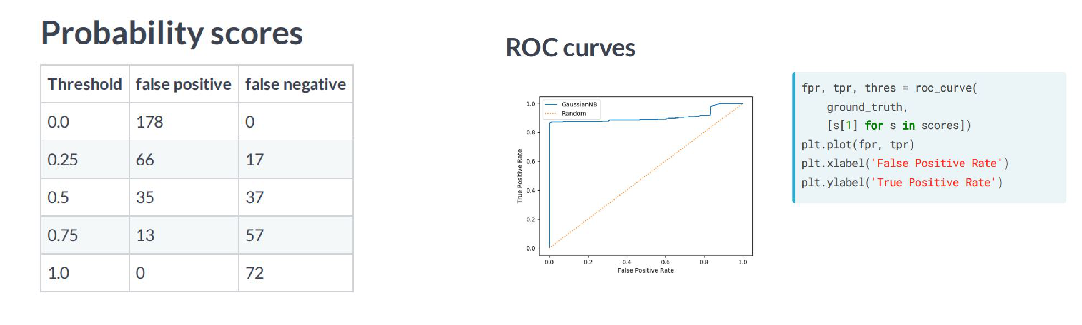

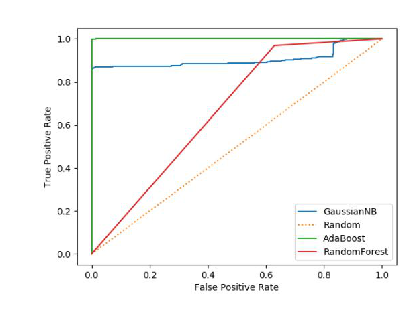

roc_auc_score AdaBoostClassifier: 0.7435989902632528

Each use case is different


In [33]:
#vídeo

# Probability scores
clf = GaussianNB().fit(X_train, y_train)

scores = clf.predict_proba(X_test)  # gives the probability for the positive and negative class label

print("predict_proba scores:\n", scores[:5], "\n...\n")

print([s[1] > 0.5 for s in scores] == clf.predict(X_test))   #s[1] --> the second element is the positive class


# Probability scores
plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "prob_scores.jpg")
plt.axis('off')
plt.imshow(imagem)

# ROC curves
from sklearn.metrics import roc_curve, roc_auc_score

# fpr, tpr, thres = roc_curve(y_test, [s[1] for s in scores])
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "roc_curves.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=2.7, top=1, wspace=0, hspace=0)
plt.show()

imagem = plt.imread(data_folder + "comparing_roc.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# AUC
clf = AdaBoostClassifier().fit(X_train, y_train)
scores_ab = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, [s[1] for s in scores_ab])

print("roc_auc_score AdaBoostClassifier:", roc_auc)

######################################################################

# Cost minimisation

def my_scorer(y_test, y_est, cost_fp=10.0, cost_fn=1.0):
    tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
    return cost_fp*fp + cost_fn*fn

t_range = [0.0, 0.25, 0.5, 0.75, 1.0]

# costs = [my_scorer(y_test, [s[1] > thres for s in scores]) for thres in t_range]

print("\nEach use case is different")

Exercício 13

In [34]:
# Default thresholding

# You would like to confirm that the DecisionTreeClassifier uses the same default classification threshold as mentioned in 
# the previous lesson, namely 0.5. It seems strange to you that all classifiers should use the same threshold. Let's check!
# A fitted decision tree classifier clf has been preloaded for you, as have the training and test data with their usual 
# names: X_train, X_test, y_train and y_test. You will have to extract probability scores from the classifier using the 
# .predict_proba() method.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#################################################

# Score the test data using the given classifier
scores = clf.predict_proba(X_test)

# Get labels from the scores using the default threshold
preds = [s[1] > 0.5 for s in scores]

# Use the predict method to label the test data again
preds_default = clf.predict(X_test)

# Compare the two sets of predictions
print(all(preds == preds_default) )

print("\nera suposto ser verdadeiro ---> tem q estar 1 e 0's. O DecisionTreeClassifier usa tb 0.5 como threshold")
print("You will later see how to tune that threshold to fit your purposes.")

False

era suposto ser verdadeiro ---> tem q estar 1 e 0's. O DecisionTreeClassifier usa tb 0.5 como threshold
You will later see how to tune that threshold to fit your purposes.


Exercício 14

In [35]:
%%script false
# Optimizing the threshold

# You heard that the default value of 0.5 maximizes accuracy in theory, but you want to test what happens in practice.
# So you try out a number of different threshold values, to see what accuracy you get, and hence determine the
# best-performing threshold value. You repeat this experiment for the F1 score. Is 0.5 the optimal threshold? Is the optimal
# threshold for accuracy and for the F1 score the same? Go ahead and find out! You have a scores matrix available, obtained 
# by scoring the test data. The ground truth labels for the test data is also available as y_test. Finally, two numpy 
# functions are preloaded, argmin() and argmax(), which retrieve the index of the minimum and maximum values in an array 
# respectively, in addition to the metrics accuracy_score() and f1_score().

from sklearn.metrics import accuracy_score, f1_score

#############################################################################

# Create a range of equally spaced threshold values that include 0.0, 0.25, 0.5, 0.75 and 1.0.
t_range = [0, 0.25, 0.5, 0.75, 1.0]

# Store the predicted labels for each value of the threshold
preds = [[s[1] > thr for s in scores] for thr in t_range]

# Compute the accuracy for each threshold
accuracies = [accuracy_score(y_test, p) for p in preds]

# Compute the F1 score for each threshold
f1_scores = [f1_score(y_test, p) for p in preds]

# Report the optimal threshold for accuracy, and for F1
print(t_range[argmax(accuracies)], t_range[argmax(f1_scores)])


# You were right to be suspicious: in practice, accuracy is sometimes optimized with a threshold other than 0.5. 
# Moreover, if you want to use a different metric, you should re-tune your threshold!

Couldn't find program: 'false'


Exercício 15

In [36]:
# Bringing it all together

# One of the engineers in your arrhythmia detection startup rushes into your office to let you know that there is a problem
# with the ECG sensor for overweight users. You decide to reduce the influence of examples with weight over 80 by 50%. 
# You are also told that since your startup is targeting the fitness market and makes no medical claims, scaring an athlete
# unnecessarily is costlier than missing a possible case of arrhythmia. You decide to create a custom loss that makes each
# "false alarm" ten times costlier than missing a case of arrhythmia. Does down-weighting overweight subjects improve this 
# custom loss? 
# X_train, y_train and X_test, y_test are preloaded, as are confusion_matrix(), numpy as np, and DecisionTreeClassifier().

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

arrh = pd.read_csv(data_folder + "arrh.csv")
y = arrh['class']
X = arrh.drop('class', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    
arrh.head()
###############################################################

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,0


In [37]:
# Create a scorer assigning more cost to false positives
def my_scorer(y_test, y_est, cost_fp=10.0, cost_fn=1.0):
    tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
    return cost_fp*fp + cost_fn*fn

# Fit a DecisionTreeClassifier to the data and compute the loss
clf = DecisionTreeClassifier(random_state=2).fit(X_train, y_train)
print("my_scorer:", my_scorer(y_test, clf.predict(X_test)))

# Refit with same seed, downweighting subjects weighing > 80
weights = [0.5 if w > 80 else 1.0 for w in X_train.weight]

clf_weighted = DecisionTreeClassifier(random_state=2).fit(X_train, y_train, sample_weight=weights)

print("weighted my_scorer:", my_scorer(y_test, clf_weighted.predict(X_test)))


my_scorer: 131.0
weighted my_scorer: 223.0


# Chapter 3 - Model Lifecycle Management

#### Exercício 1 - From workflows to pipelines

accuracy_score: 0.704
{'max_depth': 10}
{'n_estimators': 20}


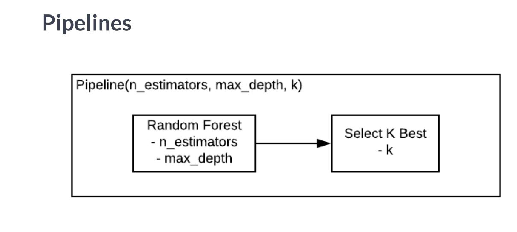

grid_search: {'classifier__max_depth': 5, 'feature_selection__k': 2}
grid_search w/ auc_scorer: {'classifier__max_depth': 5, 'feature_selection__k': 2}

Don't overdo it, 3 x 3 x 3 x 10 = 270 classifier fits


In [38]:
#vídeo

from sklearn.preprocessing import LabelEncoder

credit = pd.read_csv(data_folder + "credit.csv")
non_numeric_columns = ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status',
                       'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone',
                       'foreign_worker']

for column in non_numeric_columns:
    le = LabelEncoder()
    credit[column] = le.fit_transform(credit[column])

y = credit['class']
X = credit.drop('class', 1)

#######################################################################################################################

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif, SelectKBest

X_train, X_test, y_train, y_test = train_test_split(X, y)
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid={'max_depth': [2, 5, 10]}, cv=3)
grid_search.fit(X_train, y_train)

depth = grid_search.best_params_['max_depth']

vt = SelectKBest(f_classif, k=3).fit(X_train, y_train)

X_train_vt = X_train[X_train.columns[vt.get_support()]]
X_test_vt = X_test[X_test.columns[vt.get_support()]]

clf = RandomForestClassifier(n_estimators=100, max_depth=depth).fit(vt.transform(X_train), y_train)   # or
clf = RandomForestClassifier(n_estimators=100, max_depth=depth).fit(X_train_vt, y_train)  

print("accuracy_score:", accuracy_score(clf.predict(vt.transform(X_test)), y_test))  # or
accuracy_score(clf.predict(X_test_vt), y_test)

##############

# The power of grid search

# Optimize max_depth: ...

# Then optimize n_estimators: 
pg = {'n_estimators': [10, 20, 30]}
gs = GridSearchCV(RandomForestClassifier(max_depth=depth), param_grid=pg, cv=3)
gs.fit(X_train, y_train)
n_est = gs.best_params_['n_estimators']

# Jointly max_depth and n_estimators :
print(grid_search.best_params_)
print(gs.best_params_)

########################################################## does the order of the optimization matter?

# Pipelines

imagem = plt.imread(data_folder + "pipelines.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.1, right=1.1, top=1, wspace=0, hspace=0)
plt.show()

from sklearn.pipeline import Pipeline

pipe = Pipeline([('feature_selection', SelectKBest(f_classif)), ('classifier', RandomForestClassifier(n_estimators=100))])

params = dict(feature_selection__k=[2, 3, 4], classifier__max_depth=[5, 10, 20])

grid_search = GridSearchCV(pipe, param_grid=params, cv=3)

gs = grid_search.fit(X_train, y_train).best_params_
print("grid_search:", gs)

############################################################

# Customizing your pipeline 

# example: evaluating using the AUC score
from sklearn.metrics import roc_auc_score, make_scorer

auc_scorer = make_scorer(roc_auc_score)

grid_search = GridSearchCV(pipe, param_grid=params, scoring=auc_scorer, cv=3)
print("grid_search w/ auc_scorer:", gs)

######################

# Don't overdo it
params = dict(feature_selection__k=[2, 3, 4], clf__max_depth=[5, 10, 20], clf__n_estimators=[10, 20, 30])
grid_search = GridSearchCV(pipe, params, cv=10)
print("\nDon't overdo it, 3 x 3 x 3 x 10 = 270 classifier fits")

Exercício 2

In [39]:
# Your first pipeline - again

# Back in the arrhythmia startup, your monthly review is coming up, and as part of that an expert Python programmer will be
# reviewing your code. You decide to tidy up by following best practices and replace your script for feature selection and
# random forest classification, with a pipeline. You are using a training dataset available as X_train and y_train, and a 
# number of modules: RandomForestClassifier, SelectKBest() and f_classif() for feature selection, as well as GridSearchCV 
# and Pipeline.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.pipeline import Pipeline

arrh = pd.read_csv(data_folder + "arrh.csv")
y = arrh['class']
X = arrh.drop('class', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

############################################

In [40]:
# no exemplo usaram f_classif no SelectKBest, mas vou usar antes o chi2 pq com o outro aparecim muitos avisos
for i in X_train.columns:
    X_train[i] = abs(X_train[i])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# Create pipeline with feature selector and classifier
pipe = Pipeline([('feature_selection', SelectKBest(chi2)), ('clf', RandomForestClassifier(random_state=2))])

# Create a parameter grid
params = {'feature_selection__k':[10, 20], 'clf__n_estimators':[2, 5]}

# Initialize the grid search object
grid_search = GridSearchCV(pipe, param_grid=params, cv=3)

# Fit it to the data and print the best value combination
print("Best parameters:", grid_search.fit(X_train, y_train).best_params_)


Best parameters: {'clf__n_estimators': 5, 'feature_selection__k': 20}


Exercício 3

In [42]:
# Custom scorers in pipelines

# You are proud of the improvement in your code quality, but just remembered that previously you had to use a custom scoring
# metric in order to account for the fact that false positives are costlier to your startup than false negatives. You hence
# want to equip your pipeline with scorers other than accuracy, including roc_auc_score(), f1_score(), and you own custom 
# scoring function. The pipeline from the previous lesson is available as pipe, as is the parameter grid as params and the 
# training data as X_train, y_train. You also have confusion_matrix() for the purpose of writing your own metric.

from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, make_scorer

# Create a custom scorer
scorer = make_scorer(roc_auc_score)

# Initialize the CV object
gs = GridSearchCV(pipe, param_grid=params, scoring=scorer, cv=3)

# Fit it to the data and print the winning combination
print("scoring = roc_auc_score:", gs.fit(X_train, y_train).best_params_)

############################################################################

# Create a custom scorer
scorer = make_scorer(f1_score)

# Initialise the CV object
gs = GridSearchCV(pipe, param_grid=params, scoring=scorer, cv=3)

# Fit it to the data and print the winning combination
print("scoring = f1_score:", gs.fit(X_train, y_train).best_params_)

#############################################################################

# Create a custom scorer

def my_scorer(y_test, y_est, cost_fp=10.0, cost_fn=1.0):
    tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
    return cost_fp*fp + cost_fn*fn

scorer = make_scorer(my_scorer)

# Initialise the CV object
gs = GridSearchCV(pipe, param_grid=params, scoring=scorer, cv=3)

# Fit it to the data and print the winning combination
print("scoring = my_scorer:", gs.fit(X_train, y_train).best_params_)


scoring = roc_auc_score: {'clf__n_estimators': 5, 'feature_selection__k': 20}
scoring = f1_score: {'clf__n_estimators': 5, 'feature_selection__k': 20}
scoring = my_scorer: {'clf__n_estimators': 5, 'feature_selection__k': 10}


#### Exercício 4 - Model deployment

In [43]:
%%script false
#vídeo

# Serializing your model

# Store a classifier to file:
import pickle

clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file=file)

# Load it again from file:
with open('model.pkl', 'rb') as file:
    clf2 = pickle.load(file)
    
#############################################################
    
# Serializing your pipeline

# Development environment:
vt = SelectKBest(f_classif).fit(X_train, y_train)
clf = RandomForestClassifier(n_estimators=100).fit(vt.transform(X_train), y_train)

with open('vt.pkl', 'wb') as file:
    pickle.dump(vt)
    
with open('clf.pkl', 'wb') as file:
    pickle.dump(clf)

###########################################################

# Production environment:
print("Production environment")
with open('vt.pkl', 'rb') as file:
    vt = pickle.load(vt)
    
with open('clf.pkl', 'rb') as file:
    clf = pickle.load(clf)
    clf.predict(vt.transform(X_new))
    
    
pipe = Pipeline([('fs', SelectKBest(f_classif)), ('clf', RandomForestClassifier())])

params = dict(fs__k=[2, 3, 4], clf__max_depth=[5, 10, 20]) 

gs = GridSearchCV(pipe, params)
gs = gs.fit(X_train, y_train)

with open('pipe.pkl', 'wb') as file:
    pickle.dump(gs, file)

##################

with open('pipe.pkl', 'rb') as file:
    gs = pickle.dump(gs, file)
    gs.predict(X_test)
    

Couldn't find program: 'false'


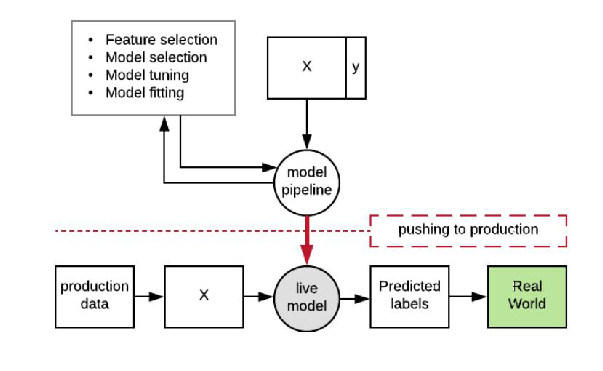

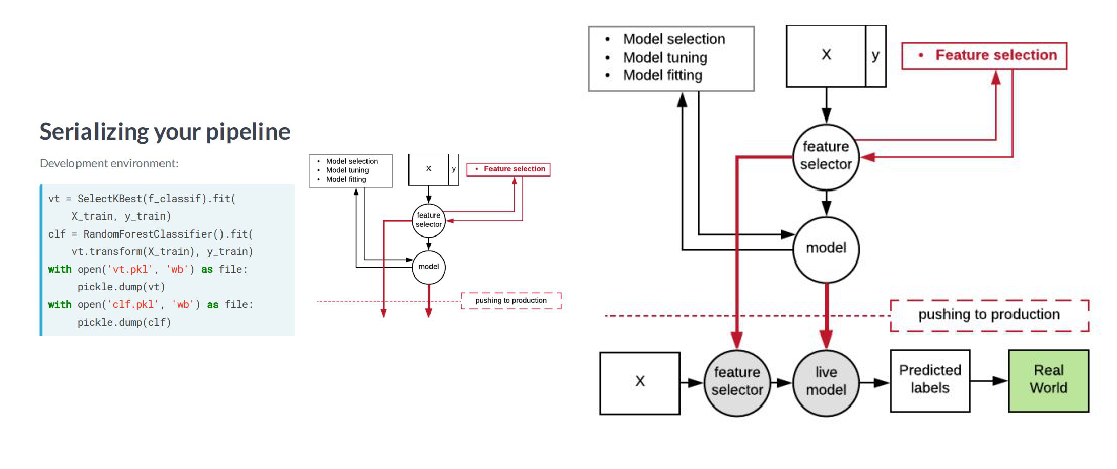

In [44]:

imagem = plt.imread(data_folder + "model_deployment.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.3, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "serializing.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "serializing2.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.5, right=2.5, top=1, wspace=0, hspace=0)
plt.show()

##################################

# Custom feature transformations
def negate_second_column(X):   # take the negative of the second column
    Z = X.copy()
    Z[:,1] = -Z[:,1]
    return Z

from sklearn.preprocessing import FunctionTransformer

pipe = Pipeline([('ft', FunctionTransformer(negate_second_column)), ('clf', RandomForestClassifier())])


Exercício 5

In [45]:
# Pickles

# Finally, it is time for you to push your first model to production. It is a random forest classifier which you will use 
# as a baseline, while you are still working to develop a better alternative. You have access to the data split in training
# test with their usual names, X_train, X_test, y_train and y_test, as well as to the modules RandomForestClassifier and 
# pickle, whose methods .load() and .dump() you will need for this exercise.

import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest to the training set
clf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

# Save it to a file, to be pushed to production
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file=file)

# Now load the model from file in the production environment
with open('model.pkl', 'rb') as file:
    clf_from_file = pickle.load(file)

# Predict the labels of the test dataset
preds = clf_from_file.predict(X_test)


Exercício 6

In [46]:
# Custom function transformers in pipelines

# At some point, you were told that the sensors might be performing poorly for obese individuals. Previously you had dealt 
# with that using weights, but now you are thinking that this information might also be useful for feature engineering, so 
# you decide to replace the recorded weight of an individual with an indicator of whether they are obese. You want to do 
# this using pipelines. 

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a feature extractor to flag very large values
def more_than_average(X, multiplier=1.0):
    Z = X.copy()
    Z[:,1] = Z[:,1] > multiplier*np.mean(Z[:,1])
    return Z

# Convert your function so that it can be used in a pipeline
pipe = Pipeline([('ft', FunctionTransformer(more_than_average)), 
                 ('clf', RandomForestClassifier(random_state=2))])

# Optimize the parameter multiplier using GridSearchCV. Try values 1, 2, 3
params = {'ft__multiplier': [1, 2, 3]}

grid_search = GridSearchCV(pipe, param_grid=params)


#### Exercício 7 - Iterating without overfitting

In [47]:
arrh = pd.read_csv(data_folder + "arrh.csv")

y = arrh['class']
X = arrh.drop('class', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

for i in X_train.columns:
    X_train[i] = abs(X_train[i])
    
pipe = Pipeline([('feature_selection', SelectKBest(chi2)), ('clf', RandomForestClassifier(random_state=2))])
params = {'feature_selection__k':[10, 20], 'clf__n_estimators':[2, 5]}
##########################################################

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


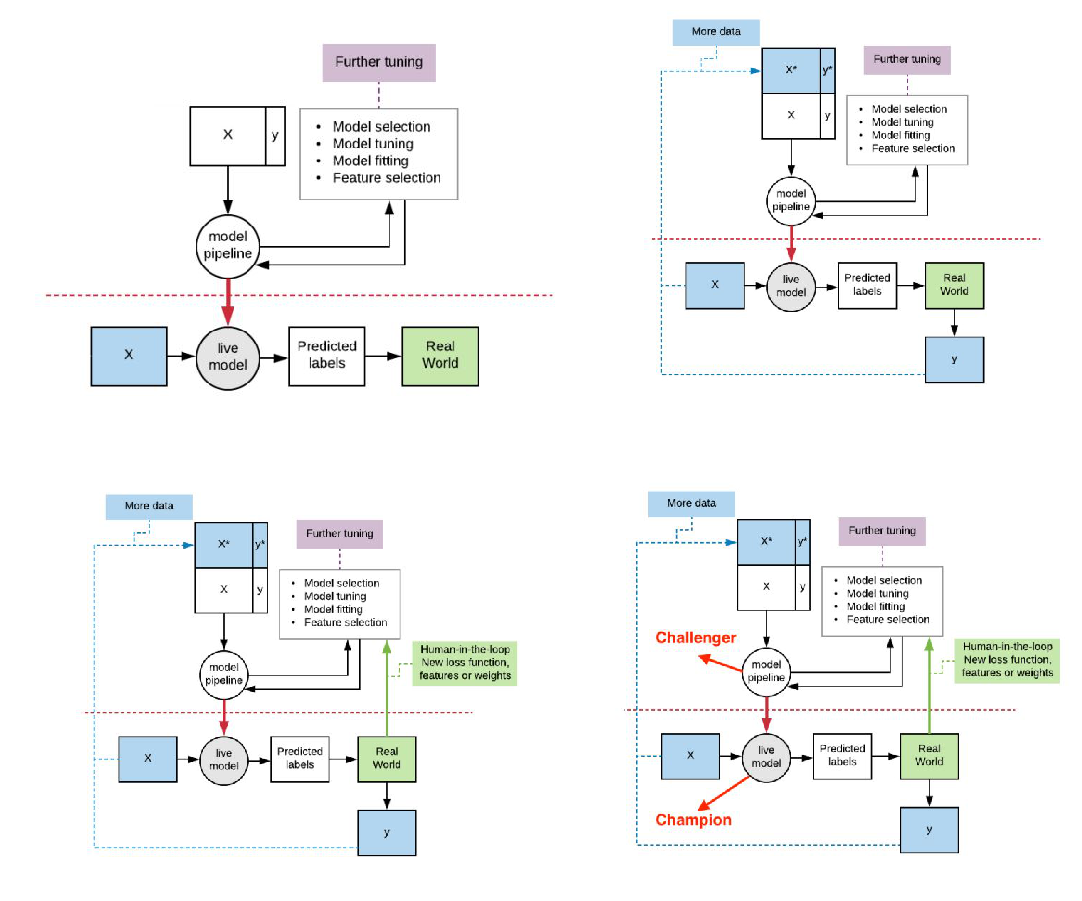

Training score much higher than test score.
The standard deviation of the test score is large


,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.839233,0.012688,0.646018,0.021677
1,0.851032,0.026630,0.610619,0.028903
2,0.969027,0.003613,0.646018,0.019117
3,0.966077,0.005519,0.699115,0.007226


In [48]:
#vídeo

plt.subplot(2, 2, 1)
imagem = plt.imread(data_folder + "7.1.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(2, 2, 2)
imagem = plt.imread(data_folder + "7.2.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(2, 2, 3)
imagem = plt.imread(data_folder + "7.3.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(2, 2, 4)
imagem = plt.imread(data_folder + "7.4.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-2, right=2.5, top=1, wspace=0, hspace=0.2)
plt.show()

#################################################

# Cross-validation results
grid_search = GridSearchCV(pipe, params, cv=3, return_train_score=True)
gs = grid_search.fit(X_train, y_train)

results = pd.DataFrame(gs.cv_results_)

# Observations:
print("Training score much higher than test score.")
print("The standard deviation of the test score is large")

results[['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
################

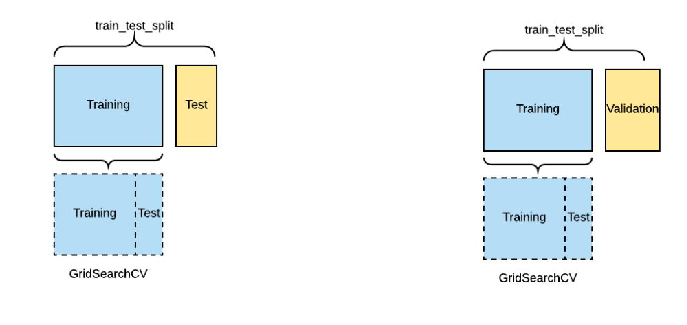

Detecting overfitting:
CV Training Score > CV Test Score:
   overfitting in model fitting stage
   reduce complexity of classier
   get more training data
   increase cv number

CV Test Score > Validation Score:
   overfitting in model tuning stage
   decrease cv number
   decrease size of parameter grid



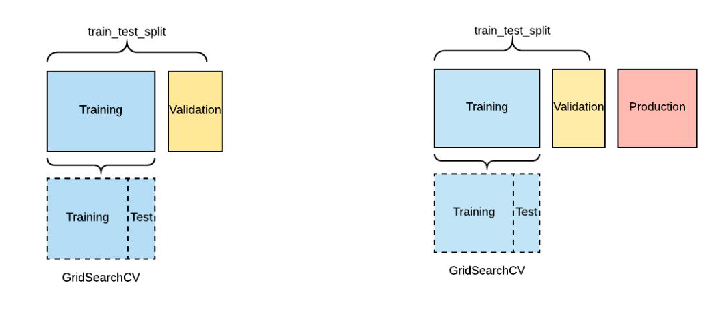

Dataset shift: when performance on the fresh data (production) is very different from the training set.


In [49]:
plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "train_test_split1.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "train_test_split2.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0.2)
plt.show()

print("Detecting overfitting:")

print("CV Training Score > CV Test Score:")
print("   overfitting in model fitting stage")
print("   reduce complexity of classier")
print("   get more training data")
print("   increase cv number\n")

print("CV Test Score > Validation Score:")
print("   overfitting in model tuning stage")
print("   decrease cv number")
print("   decrease size of parameter grid\n")

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "7_1.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "7_2.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0.2)
plt.show()

print("Dataset shift: when performance on the fresh data (production) is very different from the training set.")

Exercício 8

In [50]:
# Challenge the champion

# mesmos dados --> arrh

# Having pushed your random forest to production, you suddenly worry that a naive Bayes classifier might be better. You want
# to run a champion-challenger test, by comparing a naive Bayes, acting as the challenger, to exactly the model which is 
# currently in production, which you will load from file to make sure there is no confusion. You will use the F1 score for
# assessment. You have the data X_train, X_test, y_train and y_test available as before and GaussianNB, f1_score() and 
# pickle().


# Load the current model from disk
champion = pickle.load(open('model.pkl', 'rb'))

# Fit a Gaussian Naive Bayes to the training data
challenger = GaussianNB().fit(X_train, y_train)

# Print the F1 test scores of both champion and challenger
f1_champion = f1_score(y_test, champion.predict(X_test))
f1_challenger = f1_score(y_test, challenger.predict(X_test))

print("f1_score of the champion model: {}".format(f1_champion))
print("f1_score of the challenger model: {}".format(f1_challenger))


# replace the champion if the challenger performs better
winner = [champion if f1_champion > f1_challenger else challenger]

# Write back to disk the best-performing model
with open('model.pkl', 'wb') as file:
    pickle.dump(winner, file=file)


f1_score of the champion model: 0.5168539325842697
f1_score of the challenger model: 0.8057553956834532


Exercício 9

In [51]:
# Cross-validation statistics

# You used grid search CV to tune your random forest classifier, and now want to inspect the cross-validation results to 
# ensure you did not overfit. In particular you would like to take the difference of the mean test score for each fold from
# the mean training score. The dataset is available as X_train and y_train, the pipeline as pipe, and a number of modules 
# are pre-loaded including pandas as pd and GridSearchCV().

# Fit your pipeline using GridSearchCV with three folds
grid_search = GridSearchCV(pipe, params, cv=3, return_train_score=True)

# Fit the grid search
gs = grid_search.fit(X_train, y_train)

# Store the results of CV into a pandas dataframe
results = pd.DataFrame(gs.cv_results_)   # <--------

# Print the difference between mean test and training scores
print(results['mean_test_score'] - results['mean_train_score'])

print("""\nThe difference between training and test performance seems quite big here, and that is always a telltale sign of 
overfitting.""")

0   -0.193215
1   -0.240413
2   -0.323009
3   -0.266962
dtype: float64

The difference between training and test performance seems quite big here, and that is always a telltale sign of 
overfitting.


#### Exercício 10 - Dataset shift

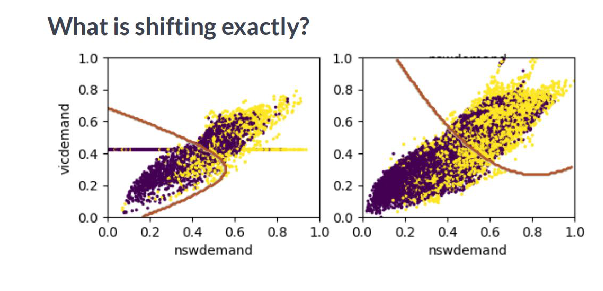

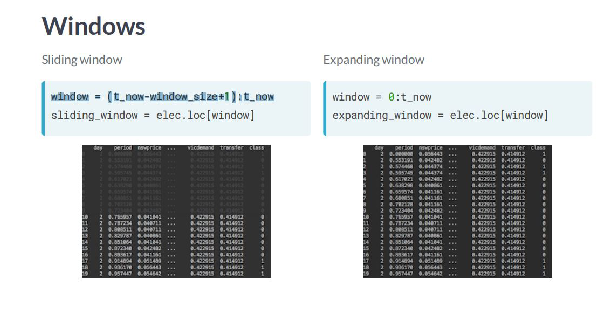

In [52]:
#vídeo

# What is dataset shift?
# electricity pricing dataset:
#    2 years worth of data.
#    class=1 represents price went up relative to last 24 hours, and 0 means down

imagem = plt.imread(data_folder + "shifting.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.5, right=1.3, top=1, wspace=0, hspace=0.2)
plt.show()

imagem = plt.imread(data_folder + "windows.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.5, right=1.3, top=1, wspace=0, hspace=0.2)
plt.show()
#############

In [53]:
%%script false
# Dataset shift detection
# t_now = 40000, window_size = 20000
clf_full = RandomForestClassifier().fit(X, y)
clf_sliding = RandomForestClassifier().fit(sliding_X, sliding_y)

# Use future data as test
test = elec.loc[t_now:elec.shape[0]]
test_X = test.drop('class', 1); test_y = test['class']

roc_auc_score(test_y, clf_full.predict(test_X))     # 0.775
roc_auc_score(test_y, clf_sliding.predict(test_X))  # 0.780   ----> confirming dataset shift

# Window size
for w_size in range(10, 100, 10):
    sliding = arrh.loc[(t_now - w_size + 1):t_now]
    X = sliding.drop('class', 1)
    y = sliding['class']
    clf = GaussianNB()
    clf.fit(X, y)
    preds = clf.predict(test_X)
    roc_auc_score(test_y, preds)   
    
######################

# ---> Domain shift
# arrhythmia dataset:

# More data is not always better

Couldn't find program: 'false'


Exercício 11

In [54]:
# Tuning the window size

# You want to check for yourself that the optimal window size for the arrhythmia dataset is 50. You have been given the 
# dataset as a pandas data frame called arrh, and want to use a subset of the data up to time t_now. 
# Your test data is available as X_test, y_test. You will try out a number of window sizes, ranging from 10 to 100, fit a 
# naive Bayes classifier to each window, assess its F1 score on the test data, and then pick the best performing window 
# size. You also have numpy available as np, and the function f1_score() has been imported already. Finally, an empty list 
# called accuracies has been initialized for you to store the accuracies of the windows.

arrh = pd.read_csv(data_folder + "arrh.csv")

y = arrh['class']
X = arrh.drop('class', 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

##########################################

accuracies = []
t_now = 400
wrange = range(10, 100, 10)

# Loop over window sizes
for w_size in wrange:

    # Define sliding window
    sliding = arrh.loc[(t_now - w_size + 1):t_now]

    # Extract X and y from the sliding window
    X, y = sliding.drop('class', 1), sliding['class']
    
    # Fit the classifier and store the F1 score
    preds = GaussianNB().fit(X, y).predict(X_test)
    accuracies.append(f1_score(y_test, preds))

# Estimate the best performing window size
optimal_window = wrange[np.argmax(accuracies)]

print("accuracies:", accuracies)
print("\noptimal_window:", optimal_window)
print("""\nYou now realise that the possibility of dataset shift introduces yet another parameter to optimize: the window 
size. This cannot be done with Cross-Validation on historical data, but instead requires the technique shown here.""")

accuracies: [0.515625, 0.4925373134328358, 0.7485380116959064, 0.7636363636363636, 0.7530864197530864, 0.7484662576687117, 0.8089887640449438, 0.7955801104972376, 0.7978142076502733]

optimal_window: 70

You now realise that the possibility of dataset shift introduces yet another parameter to optimize: the window 
size. This cannot be done with Cross-Validation on historical data, but instead requires the technique shown here.


Exercício 12

In [55]:
%%script false
# Bringing it all together

# You have two concerns about your pipeline at the arrhythmia detection startup:

# 1) The app was trained on patients of all ages, but is primarily being used by fitness users who tend to be young. You 
# suspect this might be a case of domain shift, and hence want to disregard all examples above 50 years old.

# 2) You are still concerned about overfitting, so you want to see if making the random forest classifier less complex and 
# selecting some features might help with that.

arrh = pd.read_csv(data_folder + "arrh.csv")

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pickle
from sklearn.ensemble import RandomForestClassifier

##################################################################################

# Create a pipeline 
pipe = Pipeline([('ft', SelectKBest()), ('clf', RandomForestClassifier(n_estimators=100, random_state=2))])

# Create a parameter grid
grid = {'ft__k':[5, 10], 'clf__max_depth':[10, 20]}

# Execute grid search CV on a dataset containing under 50s
grid_search = GridSearchCV(pipe, param_grid=grid, cv=3)
arrh = arrh.loc[np.where(arrh['age'] < 50)]
grid_search.fit(arrh.drop('class', 1), arrh['class'])

# Push the fitted pipeline to production
with open('pipe.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

# erro
# C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features 
# [ 19  21  22  24  25  31  35  36  37  49  55  59  61  62  67  69  71  72
#   74  83  84  85  86 121 131 132 133 139 141 142 143 144 145 151 154 156
#  157 158 164 174 194 204 264 274] are constant.

Couldn't find program: 'false'


# Chapter 4 - Unsupervised Workflows

#### Exercício 1 - Anomaly detection

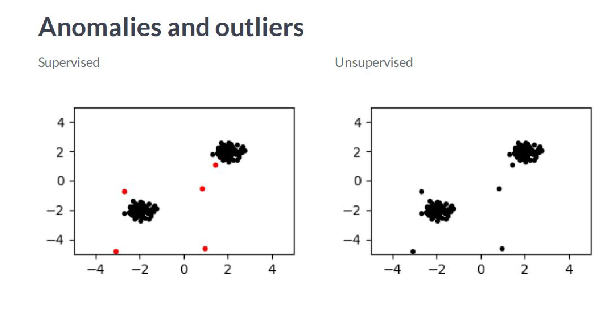

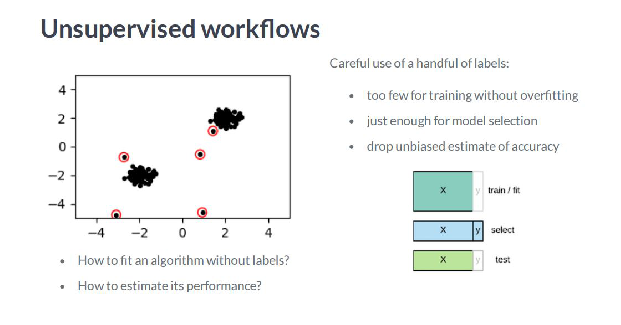

Outlier: a datapoint that lies outside the range of the majority of the data.
Local outlier: a datapoint that lies in an isolated region without other data.

Local outlier factor (LoF)


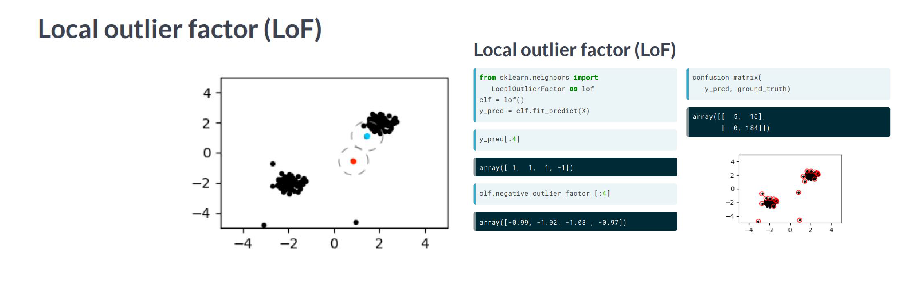

[ 1  1 -1  1]
clf.negative_outlier_factor_[:4]:
 [-1.07657823 -1.39859076 -1.50706495 -0.98694953]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [56]:
#vídeo

# Anomalies and outliers
imagem = plt.imread(data_folder + "anomalies.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1.3, top=1, wspace=0, hspace=0.2)
plt.show()

# One ofthe two classes is very rare
# Extreme case of dataset shift
# Examples:
#   cybersecurity
#   fraud detection
#   anti-money laundering
#   fault detection

# Unsupervised workflows
imagem = plt.imread(data_folder + "unsupervised.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1.6, top=1, wspace=0, hspace=0.2)
plt.show()

##########################################

print("""Outlier: a datapoint that lies outside the range of the majority of the data.""")
print("""Local outlier: a datapoint that lies in an isolated region without other data.""")

# Local outlier factor (LoF)
print("\nLocal outlier factor (LoF)")

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "lof_1.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "lof_2.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0.2)
plt.show()

#########

from sklearn.neighbors import LocalOutlierFactor as lof

clf = lof()

y_pred = clf.fit_predict(X)

# first 4
print(y_pred[:4])  # normal data is 1 and anomalies are represented as -1

# 
print("clf.negative_outlier_factor_[:4]:\n", clf.negative_outlier_factor_[:4]) # the higher the value, more normal

# confusion matrix
# confusion_matrix(y_pred, ground_truth)

################

clf = lof(contamination=0.02)   # estimation on the percentage of outliers on the data --> flags the highest scoring anomal.
                                # default value for contamination is 0.1 but as the warning says it'l change to 'auto',
                                # whatever
y_pred = clf.fit_predict(X)

# confusion_matrix(y_pred, ground_truth)


Exercício 2

In [57]:
# A simple outlier

# When you first encounter a new type of algorithm, it is always a great idea to test it with a very simple example. 
# So you decide to create a list containing thirty examples with the value 1.0 and just one example with value 10.0, which
# you expect should be flagged as an outlier. To make sure you use the algorithm correctly, you convert the list to a pandas
# dataframe, and feed it into the local outlier factor algorithm

# Import the LocalOutlierFactor module
from sklearn.neighbors import LocalOutlierFactor as lof

# Create the list [1.0, 1.0, ..., 1.0, 10.0] as explained
x = [1]*30
x.append(10)

# Cast to a data frame
X = pd.DataFrame(x)

# Fit the local outlier factor and print the outlier scores
print(lof(contamination='auto').fit_predict(X)) 

# as you can see it correctly identified the outlier in this case. -1 stands for the anomalous cases

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1]


Exercício 3

In [58]:
# LoF contamination

# Your medical advisor at the arrhythmia startup informs you that your training data might not contain all possible types 
# of arrhythmia. How on earth will you detect these other types without any labeled examples? Could an anomaly detector 
# tell the difference between healthy and unhealthy without access to labels? But first, you experiment with the 
# contamination parameter to see its effect on the confusion matrix. You have LocalOutlierFactor as lof, numpy as np, the
# labels as ground_truth encoded in -1 and 1 just like local outlier factor output, and the unlabeled training data as X.

ground_truth = [-1.0, -1.0, -1.0,1.0, -1.0, -1.0, 1.0, 1.0, 1.0,-1.0, -1.0, 1.0, -1.0, -1.0,1.0, 1.0, -1.0,1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0,1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0,1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0,1.0, 1.0,1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0,-1.0, -1.0, -1.0, -1.0, -1.0, 1.0,-1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0,1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0,1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0,-1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0,-1.0,1.0, -1.0, -1.0, -1.0,-1.0, -1.0, -1.0, -1.0, 1.0,1.0, -1.0, -1.0, 1.0, 1.0,1.0, -1.0, -1.0, 1.0, -1.0,1.0, 1.0, 1.0, -1.0, 1.0,1.0, -1.0, 1.0,-1.0, -1.0, 1.0, -1.0, -1.0, -1.0,1.0, -1.0,-1.0, -1.0,-1.0, 1.0, 1.0, -1.0, 1.0, -1.0,-1.0, 1.0, -1.0, 1.0, 1.0,1.0, -1.0,1.0, 1.0, 1.0, -1.0, 1.0,-1.0, 1.0, 1.0,1.0, 1.0, 1.0, -1.0, 1.0,-1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0,-1.0, -1.0, -1.0, -1.0,1.0, -1.0, 1.0, 1.0,1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0,1.0, -1.0,1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0,-1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0,-1.0,1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0,1.0, -1.0, 1.0, 1.0, -1.0, -1.0,1.0, -1.0,-1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0,1.0,-1.0, 1.0,1.0, 1.0, -1.0, -1.0, 1.0, -1.0,-1.0, 1.0, -1.0, 1.0, -1.0,1.0, 1.0, -1.0, 1.0,-1.0, -1.0, 1.0, -1.0, -1.0,-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0,-1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0,-1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0]

arrh = pd.read_csv(data_folder + "arrh.csv")

X = arrh.drop('class', 1)


In [59]:
# Fit the local outlier factor and output predictions
preds = lof(contamination='auto').fit_predict(X)

# Print the confusion matrix
print("confusion_matrix with contamination='auto':\n", confusion_matrix(ground_truth, preds))

#########

# Set the contamination parameter to 0.2
preds = lof(contamination=0.2).fit_predict(X)

# Print the confusion matrix
print("\nconfusion_matrix with contamination=0.2:\n", confusion_matrix(ground_truth, preds))

########

# Now set the contamination to be equal to the actual proportion of outliers in the data.

# Contamination to match outlier frequency in ground_truth
preds = lof(contamination= ground_truth.count(-1)/len(ground_truth)).fit_predict(X)

# Print the confusion matrix
print("\nconfusion_matrix with contamination to match outlier frequency in ground_truth:\n", 
      confusion_matrix(ground_truth, preds))


confusion_matrix with contamination='auto':
 [[ 31 176]
 [  2 243]]

confusion_matrix with contamination=0.2:
 [[ 72 135]
 [ 19 226]]

confusion_matrix with contamination to match outlier frequency in ground_truth:
 [[141  66]
 [ 66 179]]


#### Exercício 4 - Novelty detection

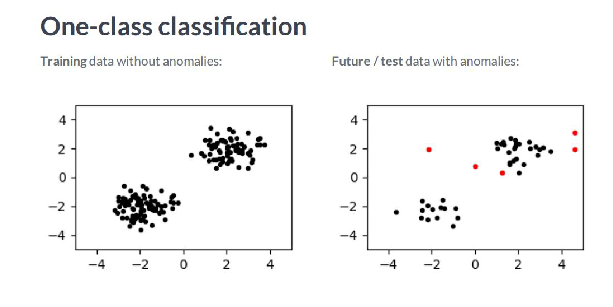

Novelty LoF:
[ 1 -1 -1  1]

roc_auc_score LocalOutlierFactor: 0.7857923497267759
roc_auc_score IsolationForest: 0.752568306010929
roc_auc_score OneClassSVM: 0.7822950819672131

accuracy_score LocalOutlierFactor: 0.5441176470588235
accuracy_score IsolationForest: 0.5514705882352942
accuracy_score OneClassSVM: 0.20588235294117646


In [60]:
#vídeo

# One-class classification
imagem = plt.imread(data_folder + "one_class.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.3, top=1, wspace=0, hspace=0.2)
plt.show()

# Novelty LoF
print("Novelty LoF:")

# Workaround
preds = lof(contamination='auto').fit_predict(np.concatenate([X_train, X_test]))
preds = preds[X_train.shape[0]:]

# Novelty LoF
clf = lof(contamination='auto', novelty=True)
clf.fit(X_train)
y_pred = clf.predict(X_test)

###########

# One-class Support Vector Machine
from sklearn.svm import OneClassSVM

clf = OneClassSVM(gamma='scale')
clf.fit(X_train)

y_pred = clf.predict(X_test)
print(y_pred[:4])

#####

clf = OneClassSVM(gamma='scale')
clf.fit(X_train)

y_scores = clf.score_samples(X_test)

threshold = np.quantile(y_scores, 0.1)

y_pred = y_scores <= threshold

###############################################

# Isolation Forests
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

clf = IsolationForest(contamination='auto', behaviour="new")
clf.fit(X_train)

y_scores = clf.score_samples(X_test)

clf = LocalOutlierFactor(contamination='auto', novelty=True)
clf.fit(X_train)

y_scores = clf.score_samples(X_test)

#####################################################

clf_lof = LocalOutlierFactor(contamination='auto', novelty=True).fit(X_train)
clf_isf = IsolationForest(contamination='auto', behaviour="new").fit(X_train)
clf_svm = OneClassSVM(gamma='scale').fit(X_train)

# ROC AUC scores
print("\nroc_auc_score LocalOutlierFactor:", roc_auc_score(y_test, clf_lof.score_samples(X_test)))
print("roc_auc_score IsolationForest:", roc_auc_score(y_test, clf_isf.score_samples(X_test)))
print("roc_auc_score OneClassSVM:", roc_auc_score(y_test, clf_svm.score_samples(X_test)))

# accuracy scores
print("\naccuracy_score LocalOutlierFactor:", accuracy_score(y_test, clf_lof.predict(X_test)))
print("accuracy_score IsolationForest:", accuracy_score(y_test, clf_isf.predict(X_test)))
print("accuracy_score OneClassSVM:", accuracy_score(y_test, clf_svm.predict(X_test)))


Exercício 5

In [61]:
# A simple novelty

# You find novelty detection more useful than outlier detection, but want to make sure it works on the simple example you 
# came up with before. This time you will use a sequence of thirty examples all with value 1.0 as a training set, and try 
# to see if the example 10.0 is labeled as a novelty. 

from sklearn.neighbors import LocalOutlierFactor as lof

# Create a list of thirty 1s and cast to a dataframe
X = pd.DataFrame([1.0]*30)

# Create an instance of a lof novelty detector
detector = lof(contamination='auto', novelty=True)

# Fit the detector to the data
detector.fit(X)

# Use it to predict the label of an example with value 10.0
detector.predict(pd.DataFrame([10.0]))


array([-1])

Exercício 6

In [62]:
# Three novelty detectors

# Finally, you know enough to run some tests on the use of a few anomaly detectors on the arrhythmia dataset. To test their
# performance, you will train them on an unlabeled training dataset, but then compare their predictions to the ground truth 
# on the test data using their method .score_samples(). This time, you will be asked to import the detectors as part of the 
# exercise, but you do have the data X_train, X_test, y_train, y_test preloaded as usual.

arrh = pd.read_csv(data_folder + "arrh.csv")

X = arrh.drop('class', 1)
y = arrh['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

##########################

# Import the novelty detector
from sklearn.svm import OneClassSVM

# Fit it to the training data and score the test data
svm_detector = OneClassSVM(gamma='scale').fit(X_train)
scores_svm = svm_detector.score_samples(X_test)

#############################

# Adapt your code to import the isolation forest from the ensemble module as isof, fit it and score the test data.

# Import the novelty detector
from sklearn.ensemble import IsolationForest

# Fit it to the training data and score the test data
ensemble_detector = IsolationForest(behaviour='new', contamination='auto').fit(X_train)
scores_isof = ensemble_detector.score_samples(X_test)

###########################

# Adapt your code to import the LocalOutlierFactor module as lof, fit it to the training data, and score the test data.

# Import the novelty detector
from sklearn.neighbors import LocalOutlierFactor

# Fit it to the training data and score the test data
lof_detector = LocalOutlierFactor(contamination='auto', novelty=True).fit(X_train)
scores_lof = lof_detector.score_samples(X_test)



scores_svm
scores_isof
scores_lof

# ROC AUC scores
print("\nroc_auc_score LocalOutlierFactor:", roc_auc_score(y_test, scores_svm))
print("roc_auc_score IsolationForest:", roc_auc_score(y_test, scores_isof))
print("roc_auc_score OneClassSVM:", roc_auc_score(y_test, scores_lof))

scores_lof


roc_auc_score LocalOutlierFactor: 0.8633776091081593
roc_auc_score IsolationForest: 0.8513598987982289
roc_auc_score OneClassSVM: 0.8545224541429475


array([-1.89862012, -1.08323433, -1.01969766, -1.08003642, -1.1314109 ,
       -0.96978604, -1.29147621, -0.99735365, -1.04396981, -1.43890374,
       -1.02448199, -1.02008769, -1.16461655, -1.14901677, -0.97471241,
       -1.21116961, -1.00555984, -1.02789296, -1.72927127, -1.1804295 ,
       -1.17519743, -1.13263221, -1.30134121, -1.00313112, -1.03533904,
       -1.25483368, -1.0353234 , -0.97793216, -1.72046249, -0.9990011 ,
       -1.02196885, -1.52137269, -1.13938094, -1.2113338 , -1.06408757,
       -1.17128127, -1.07572197, -0.98725123, -1.02758911, -1.2012258 ,
       -0.99747397, -1.13957105, -0.98022133, -1.0763147 , -1.05655763,
       -1.3283102 , -1.02679098, -1.10858226, -1.01199469, -1.01006118,
       -0.98500379, -1.12816355, -1.26926885, -1.62355626, -1.07838081,
       -1.06828984, -1.91147459, -1.21103672, -1.18688537, -0.99091361,
       -1.24787829, -1.0483097 , -0.97893414, -0.99478202, -1.07996969,
       -1.1710902 , -1.06910753, -1.25595829, -1.6130642 , -1.04

Exercício 7

In [63]:
# Contamination revisited

# You notice that one-class SVM does not have a contamination parameter. But you know well by now that you really need a way
# to control the proportion of examples that are labeled as novelties in order to control your false positive rate. So you 
# decide to experiment with thresholding the scores. The detector has been imported as onesvm, you also have available the 
# data as X_train, X_test, y_train, y_test, numpy as np, and confusion_matrix().

# Fit a one-class SVM detector and score the test data
nov_det = OneClassSVM(gamma='scale').fit(X_train)
scores = nov_det.score_samples(X_test)

# Find the observed proportion of outliers in the test data
prop = np.mean(y_test==1)

# Compute the appropriate threshold
threshold = np.quantile(scores, prop)

# Print the confusion matrix for the thresholded scores
confusion_matrix(y_test, scores > threshold)


array([[43,  8],
       [19, 43]], dtype=int64)

#### Exercício 8 - Distance-based learning

In [64]:
#vídeo

# Distance and similarity ----> How to measure similarity, or, equivantly, disimilarity?

from sklearn.neighbors import DistanceMetric as dm

dist = dm.get_metric('euclidean')
X = [[0,1], [2,3], [0,6]]
print("Euclidean DistanceMetric:\n", dist.pairwise(X))

################

# Non-Euclidean Local Outlier Factor
clf = LocalOutlierFactor(contamination='auto', novelty=True, metric='chebyshev')
clf.fit(X_train)
y_pred = clf.predict(X_test)

dist = dm.get_metric('chebyshev')
X = [[0,1], [2,3], [0,6]]
print("\nchebyshev DistanceMetric:\n", dist.pairwise(X))

#####################

# Hamming distance matrix:
dist = dm.get_metric('hamming')
X = [[0,1], [2,3], [0,6]]
print("\nhamming DistanceMetric:\n", dist.pairwise(X))

####################
print("\n================================================================")

# Are all metrics similar? ----> in addition to the neighbors model, there are more metrics:

from scipy.spatial.distance import pdist      # the difference is that pdist outputs a condensed form of the distance matrix
                                              # with its unique elements in sequence

from scipy.spatial.distance import squareform # to recover the square form, use 'squareform' before

X = [[0,1], [2,3], [0,6]]

print("\npdist 'cityblock':", pdist(X, 'cityblock'), "------> condensed form of the distance matrix")
print("\nsquareform pdist 'cityblock':\n", squareform(pdist(X,'cityblock')))

#########################################
print("\n================================================================")
print("hepatitis dataset:\n")

# A real-world example
# The Hepatitis dataset:
hep = pd.read_csv(data_folder + "hep.csv")
X_hep = hep.drop('Class', axis=1)

# Euclidean distance:
print("Euclidian distance:\n", squareform(pdist(X_hep, 'euclidean')))

# Hamming distance:
print("\nHamming distance:\n", squareform(pdist(X_hep, 'hamming')))

####
print("""\nDistinguish between euclidian and hamming use. In this case the hamming distance was more appropriate: compare
Class and X. There was a disproportioned larger effect from numeric variables like age on the Euclidian distances.
Hamming distances look at agreement per feature, rather than distance.""")
print("An anomaly detector combined with an appropriate distance metric can be a powerful tool.")

Euclidean DistanceMetric:
 [[0.         2.82842712 5.        ]
 [2.82842712 0.         3.60555128]
 [5.         3.60555128 0.        ]]

chebyshev DistanceMetric:
 [[0. 2. 5.]
 [2. 0. 3.]
 [5. 3. 0.]]

hamming DistanceMetric:
 [[0.  1.  0.5]
 [1.  0.  1. ]
 [0.5 1.  0. ]]


pdist 'cityblock': [4. 5. 5.] ------> condensed form of the distance matrix

squareform pdist 'cityblock':
 [[0. 4. 5.]
 [4. 0. 5.]
 [5. 5. 0.]]

hepatitis dataset:

Euclidian distance:
 [[  0.          20.55042579 224.91353894 ... 147.91257553  37.07249654
   35.8036311 ]
 [ 20.55042579   0.         222.11839185 ... 146.58802816  41.28110948
   49.80662607]
 [224.91353894 222.11839185   0.         ...  77.70643474 232.09569147
  234.20375744]
 ...
 [147.91257553 146.58802816  77.70643474 ...   0.         155.80789454
  156.95289102]
 [ 37.07249654  41.28110948 232.09569147 ... 155.80789454   0.
   22.40736486]
 [ 35.8036311   49.80662607 234.20375744 ... 156.95289102  22.40736486
    0.        ]]

Hamming distance:

Exercício 9

In [65]:
# Find the neighbor

# It is clear that the local outlier factor algorithm depends a lot on the idea of a nearest neighbor, which in turn depends
# on the choice of distance metric. So you decide to experiment some more with the hepatitis dataset introduced in the 
# previous lesson. You are given three examples stored in features, whose classes are stored in labels. You will identify
# the nearest neighbor to the first example (row with index 0) using three different distance metrics, Euclidean, Hamming 
# and Chebyshev, and on the basis of that choose which distance metric to use. You will import the necessary module as part
# of the exercise, but pandas and numpy already available, as are features and their labels labels.

hep = pd.read_csv(data_folder + "hep.csv")

labels = [2, 2, 1, 1]  # correspondia aos valores da Class da df construída abaixo

features = hep.loc[hep.index.isin([50, 52, 54, 55])].drop('Class', axis=1).reset_index(drop=True)
features

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,50.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.9,230.0,117.0,3.4,41.0,2.0
1,40.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.6,40.0,69.0,4.2,67.0,2.0
2,47.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,84.0,23.0,4.2,66.0,2.0
3,48.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,4.8,123.0,157.0,2.7,31.0,2.0


In [66]:
# Import DistanceMetric as dm
from sklearn.neighbors import DistanceMetric as dm

# Find the Euclidean distance between all pairs
dist_eucl = dm.get_metric('euclidean').pairwise(features)

# Find the Hamming distance between all pairs
dist_hamm = dm.get_metric('hamming').pairwise(features)

# Find the Chebyshev distance between all pairs
dist_cheb = dm.get_metric('chebyshev').pairwise(features)

# Inspect the matrices dist_eucl, dist_hamm and dist_cheb in your terminal and identify the nearest neighbor to the first 
# example for each metric. 

print("Euclidean:\n", dist_eucl)
print("\nHamming:\n", dist_hamm)
print("\nChebyshev:\n", dist_cheb)

# Noting that the labels of the three examples are, respectively, 2.0, 2.0 and 1.0, pick one of the following answers:
print("\n The Hamming metric seems to perform best.")

Euclidean:
 [[  0.         197.95638408 175.48461471 114.781096  ]
 [197.95638408   0.          64.13236313 126.56575366]
 [175.48461471  64.13236313   0.         143.93779907]
 [114.781096   126.56575366 143.93779907   0.        ]]

Hamming:
 [[0.         0.63157895 0.68421053 0.63157895]
 [0.63157895 0.         0.73684211 0.63157895]
 [0.68421053 0.73684211 0.         0.57894737]
 [0.63157895 0.63157895 0.57894737 0.        ]]

Chebyshev:
 [[  0. 190. 146. 107.]
 [190.   0.  46.  88.]
 [146.  46.   0. 134.]
 [107.  88. 134.   0.]]

 The Hamming metric seems to perform best.


Exercício 10

In [67]:
# Not all metrics agree --> in outliers, too?

# In the previous exercise you saw that not all metrics agree when it comes to identifying nearest neighbors. But does this
# mean they might disagree on outliers, too? You decide to put this to the test. You use the same data as before, but this 
# time feed it into a local outlier factor outlier detector. 

from sklearn.neighbors import LocalOutlierFactor

# Compute outliers according to the euclidean metric
out_eucl = LocalOutlierFactor(contamination='auto', metric='euclidean').fit_predict(features)

# Compute outliers according to the hamming metric
out_hamm = LocalOutlierFactor(contamination='auto', metric='hamming').fit_predict(features)

# Compute outliers according to the jaccard metric
out_jacc  = LocalOutlierFactor(contamination='auto', metric='jaccard').fit_predict(features)

# Find if the metrics agree on any one datapoint
print(any(out_eucl + out_hamm + out_jacc == -3))   # The score for an outlier is -1, so if all metrics agreed on one 
                                                   # example its cumulative score would be -3.

print("""\nThere is no datapoint that all three metrics flag as an outlier. So choosing a distance metric should be done with
great caution! You now have a concrete understanding of the effect of distance metrics on outlier detection.""")

False

There is no datapoint that all three metrics flag as an outlier. So choosing a distance metric should be done with
great caution! You now have a concrete understanding of the effect of distance metrics on outlier detection.


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:253: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:253: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:253: UserWarning: n_neighbors (20) is greater than the total number of samples (4). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


#### Exercício 11 - Unstructured data

In [68]:
#vídeo

# Structured versus unstructured
proteins = pd.read_csv(data_folder + "proteins_exercises.csv")
proteins.head(10)

,label,seq
0,IMMUNE SYSTEM,LTKCQEEVSHIPAVHPGSFRPKCDENGNYLPLQCYGSIGYCWCVFP...
1,IMMUNE SYSTEM,GPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGV...
2,IMMUNE SYSTEM,FNMQCQRRFYEALHDPNLNEEQRNAKIKSIRDDC
3,IMMUNE SYSTEM,EVQLVESGGGLVQPGGSLRLSCAASGFTFTDYTMDWVRQAPGKGLE...
4,IMMUNE SYSTEM,DIQMTQSPSSLSASVGDRVTITCKASQDVSIGVAWYQQKPGKAPKL...
5,IMMUNE SYSTEM,EVKLVESGGGLVKPGGSLKLSCAASGFTFSRYALSWVRQTADKRLE...
6,IMMUNE SYSTEM,DVVVTQTPLSLPVSLGDQASISCRSSEVIVTRNGYTPIEWYLQKPG...
7,IMMUNE SYSTEM,MRGSHHHHHHGSSQVADKDDPTNKFYQSVIQLGNGFLDVFTSFGGL...
8,VIRUS,MNRGFFNMLGRRPFPAPTAMWRPRRRRQAAPMPARNGLASQIQQLT...
9,VIRUS,SDPAALKRARNTEAARRSRARKLQRMKQLEDKVEELLSKNYHLENE...


In [69]:
# Can we build a detector that ags viruses as anomalousin this data?

import stringdist

print(stringdist.levenshtein('abc', 'acc'))
print(stringdist.levenshtein('acc', 'cce'))
print(stringdist.levenshtein('ILSALVGIV', 'ILSALVGIL'))

# Some debugging

# This won't work
# pdist(proteins['seq'].iloc[:3], metric=stringdist.levenshtein)
# Traceback (most recent call last):
# ValueError: A 2-dimensional array must be passed.

sequences = np.array(proteins['seq'].iloc[:3]).reshape(-1,1)
# This won't work for a different reason
# pdist(sequences, metric=stringdist.levenshtein)
# Traceback (most recent call last):
# TypeError: argument 1 must be str, not numpy.ndarray
                             
# This one works!!
def my_levenshtein(x, y):
    return stringdist.levenshtein(x[0], y[0])

print("\n", pdist(sequences, metric=my_levenshtein))

1
2
1

 [168.  55. 184.]


In [70]:
%%time

# Protein outliers with precomputed matrices

# This takes 2 minutes for about 1000 examples
sequences = np.array(proteins['seq']).reshape(-1,1)

M = squareform(pdist(sequences, my_levenshtein))

# LoF detector with a precomputed distance matrix:
# This takes 3 seconds

from sklearn.neighbors import LocalOutlierFactor

detector = LocalOutlierFactor(metric='precomputed', contamination=0.1)
preds = detector.fit_predict(M)

print("roc_auc_score:", roc_auc_score(proteins['label'] == 'VIRUS', preds == -1))  # 0.64 --> better than random

roc_auc_score: 0.6249999999999999
Wall time: 4min 3s


Exercício 12

In [71]:
%%time
# Restricted Levenshtein

# You notice that the stringdist package also implements a variation of Levenshtein distance called the "Restricted 
# Damerau-Levenshtein" distance, and want to try it out. You will follow the logic from the lesson, wrapping it inside a 
# custom function and precomputing the distance matrix before fitting a local outlier factor anomaly detector. You will
# measure performance with accuracy_score() which is available to you as accuracy(). You also have access to packages 
# stringdist, numpy as np, pdist() and squareform() from scipy.spatial.distance, and LocalOutlierFactor as lof. The data has
# been preloaded as a pandas dataframe with two columns, label and sequence, and has two classes: IMMUNE SYSTEM and VIRUS.

proteins = pd.read_csv(data_folder + "proteins_exercises.csv")

import stringdist
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import LocalOutlierFactor

##############################

# Wrap the RD-Levenshtein metric in a custom function
def my_rdlevenshtein(u, v):
    return stringdist.rdlevenshtein(u[0], v[0])

# Reshape the array into a numpy matrix
sequences = np.array(proteins['seq']).reshape(-1, 1)

# Compute the pairwise distance matrix in square form
M = squareform(pdist(sequences, my_rdlevenshtein))

# Run a LoF algorithm on the precomputed distance matrix
preds = LocalOutlierFactor(metric='precomputed', contamination='auto').fit_predict(M)

# Compute the accuracy of the outlier predictions
print("accuracy_score:", accuracy_score(proteins['label'] == 'VIRUS', preds == -1))


# Overcoming compatibility problems when working with different Python modules is the sign of a true expert. 
# What's more, you should now feel confident that success is possible even without labels.

accuracy_score: 0.81
Wall time: 5min 6s


Exercício 13

In [72]:
# Bringing it all together

# In addition to the distance-based learning anomaly detection pipeline you created in the last exercise, you want to also 
# support a feature-based learning one with one-class SVM. You decide to extract two features: first, the length of the 
# string, and, second, a numerical encoding of the first letter of the string, obtained using the function LabelEncoder() 
# described in Chapter 1. To ensure a fair comparison, you will input the outlier scores into an AUC calculation.
# The following have been imported: LabelEncoder(), roc_auc_score() as auc() and OneClassSVM. The data is available as a
# pandas data frame called proteins with two columns, label and seq, and two classes, IMMUNE SYSTEM and VIRUS. 
# A fitted LoF detector is available as lof_detector.

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

lof_detector = LocalOutlierFactor(contamination='auto')

################################

# Create a feature that contains the length of the string
proteins['len'] = proteins['seq'].apply(lambda x: len(x))

# Create a feature encoding the first letter of the string
proteins['first'] =  LabelEncoder().fit_transform(proteins['seq'].apply(lambda x: list(x)[0]))

# Extract scores from the fitted LoF object & compute its AUC
lof_detector.fit(proteins[['len', 'first']])
scores_lof = lof_detector.negative_outlier_factor_


# Large scores in a fitted LoF detector indicate the normal class, i.e., "IMMUNE SYSTEM".
print("roc_auc_score with LocalOutlierFactor:", roc_auc_score(proteins['label']=="IMMUNE SYSTEM", scores_lof))

###

# Fit a 1-class SVM, extract its scores, and compute its AUC
svm = OneClassSVM(gamma='scale').fit(proteins[['len', 'first']])

scores_svm = svm.score_samples(proteins[['len', 'first']])

print("roc_auc_score with OneClassSVM:", roc_auc_score(proteins['label']=="IMMUNE SYSTEM", scores_svm))


roc_auc_score with LocalOutlierFactor: 0.7265625
roc_auc_score with OneClassSVM: 0.6609375000000001


# Fim